In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
unemployment_df=pd.read_csv('Unemployment in India.csv')
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [3]:
unemployment_df.columns = unemployment_df.columns.str.strip()

In [4]:
unemployment_df.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [5]:
unemployment_df = unemployment_df.dropna()

In [6]:
numeric_columns = unemployment_df.select_dtypes(include=['number'])
# Calculate mean, median, standard deviation, minimum, and maximum
summary_stats = numeric_columns.agg(['mean', 'median', 'std', 'min', 'max'])
print(summary_stats)

        Estimated Unemployment Rate (%)  Estimated Employed  \
mean                          11.787946        7.204460e+06   
median                         8.350000        4.744178e+06   
std                           10.721298        8.087988e+06   
min                            0.000000        4.942000e+04   
max                           76.740000        4.577751e+07   

        Estimated Labour Participation Rate (%)  
mean                                  42.630122  
median                                41.160000  
std                                    8.111094  
min                                   13.330000  
max                                   72.570000  


In [7]:
unemployment_df.Region.unique() # find unique occurances of states

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [8]:
region_df=unemployment_df["Region"].value_counts() #count the no of occurances of each state
print(region_df)

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64


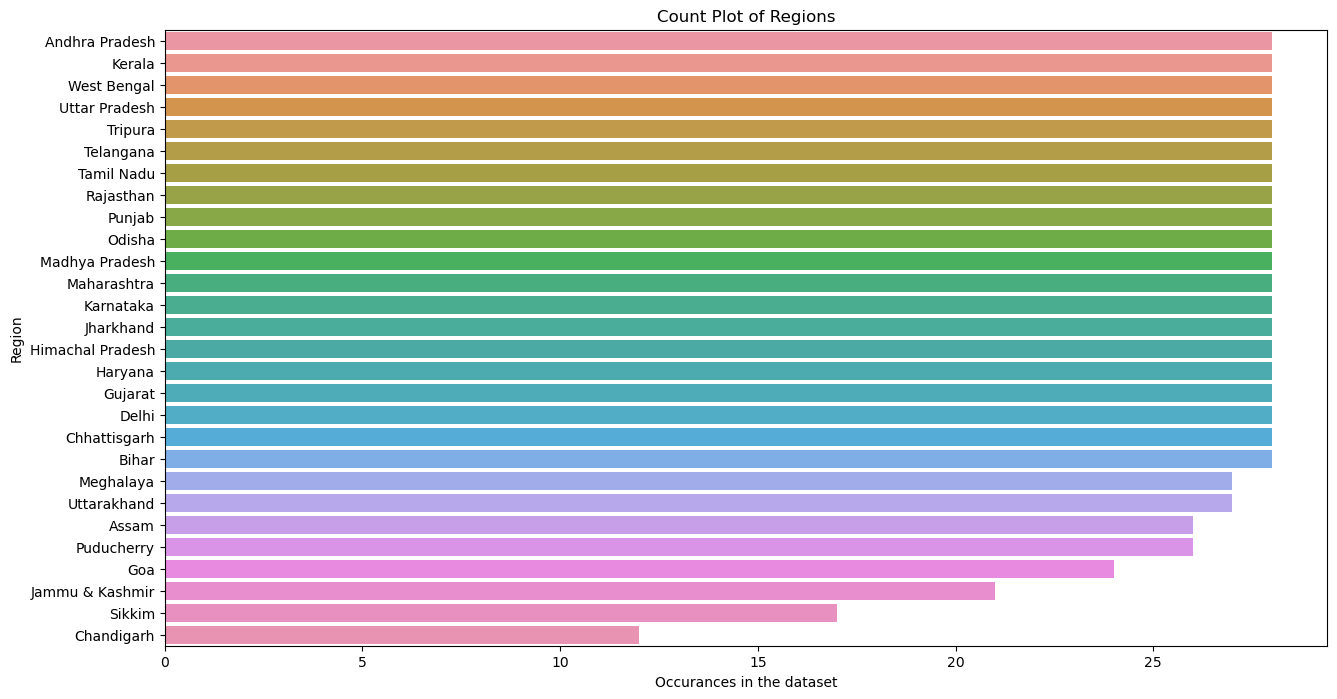

In [9]:
plt.figure(figsize=(15, 8))
sns.countplot(y='Region', data=unemployment_df, order=unemployment_df['Region'].value_counts().index)
plt.title('Count Plot of Regions')
plt.xlabel('Occurances in the dataset')
plt.ylabel('Region')
plt.show()

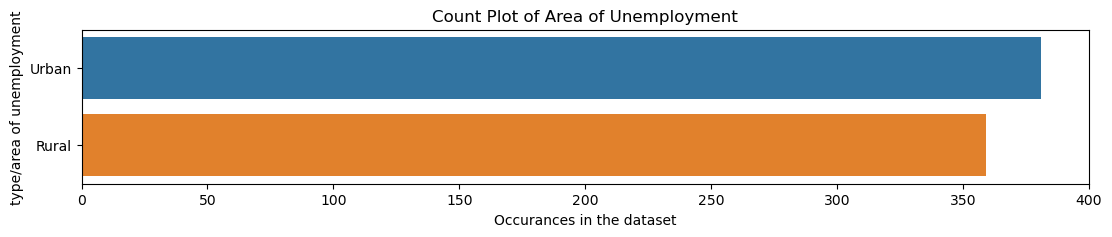

In [10]:
plt.figure(figsize=(13, 2))
sns.countplot(y='Area', data=unemployment_df, order=unemployment_df['Area'].value_counts().index)
plt.title('Count Plot of Area of Unemployment')
plt.xlabel('Occurances in the dataset')
plt.ylabel('type/area of unemployment')
plt.show()

In [11]:
unemployment_df.Frequency.unique()

array([' Monthly', 'Monthly'], dtype=object)

In [12]:
unemployment_df.replace([np.inf, -np.inf], np.nan, inplace=True)
unemployment_df.dropna(inplace=True)

array([[<Axes: title={'center': 'Estimated Unemployment Rate (%)'}>,
        <Axes: title={'center': 'Estimated Employed'}>],
       [<Axes: title={'center': 'Estimated Labour Participation Rate (%)'}>,
        <Axes: >]], dtype=object)

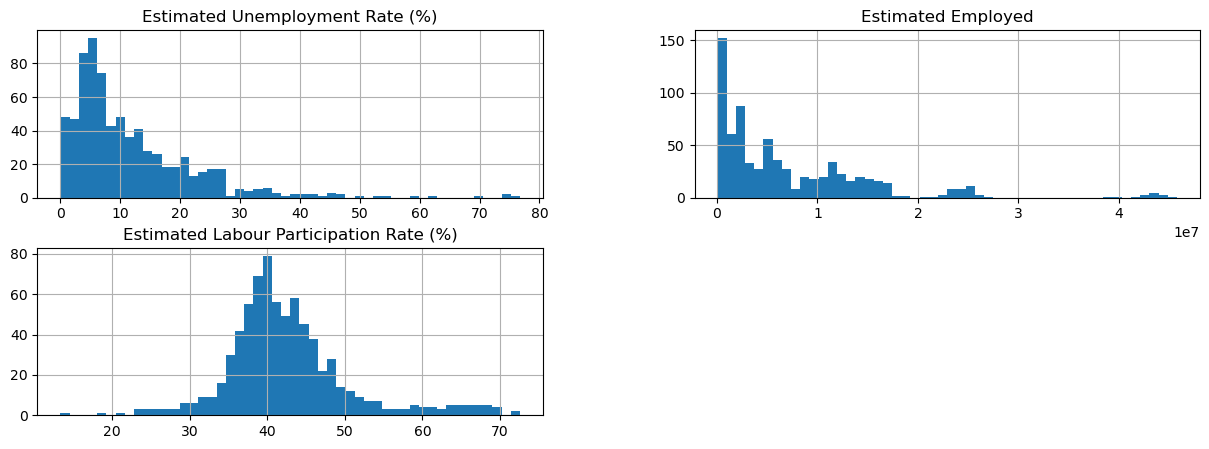

In [13]:
unemployment_df.hist(bins=50, figsize=(15,5)) # plot histograms of numeric coloumns 

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


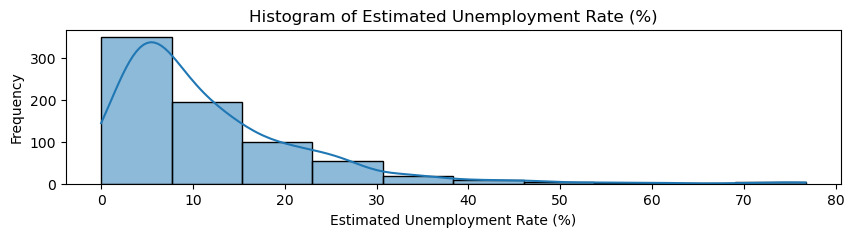

In [14]:
plt.figure(figsize=(10, 2))
sns.histplot(unemployment_df['Estimated Unemployment Rate (%)'], bins=10, kde=True)
plt.title('Histogram of Estimated Unemployment Rate (%)')
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()


C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


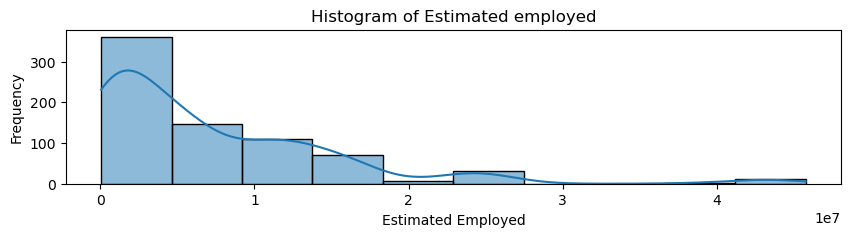

In [15]:
plt.figure(figsize=(10, 2))
sns.histplot(unemployment_df['Estimated Employed'], bins=10, kde=True)
plt.title('Histogram of Estimated employed')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')
plt.show()

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


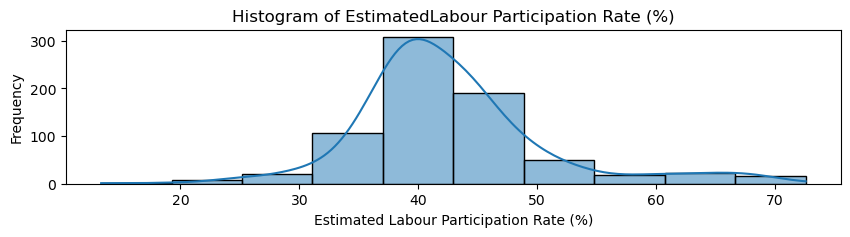

In [16]:
plt.figure(figsize=(10, 2))
sns.histplot(unemployment_df['Estimated Labour Participation Rate (%)'], bins=10, kde=True)
plt.title('Histogram of EstimatedLabour Participation Rate (%)')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

In [17]:
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date'], format='mixed')
regions = unemployment_df['Region'].unique()

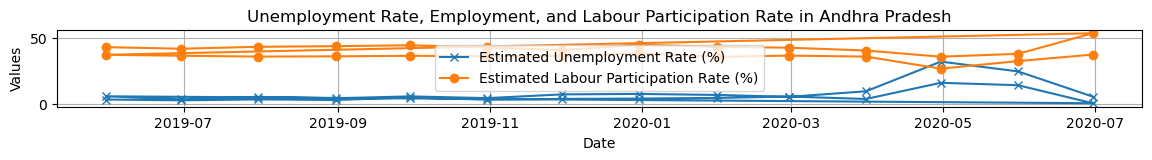

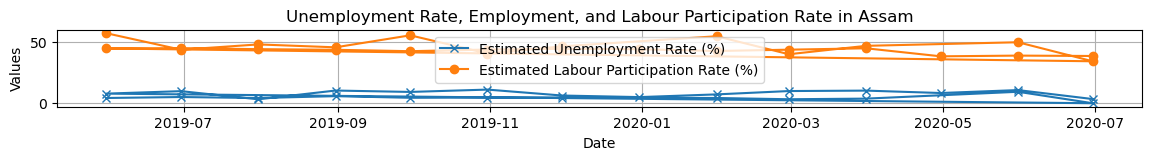

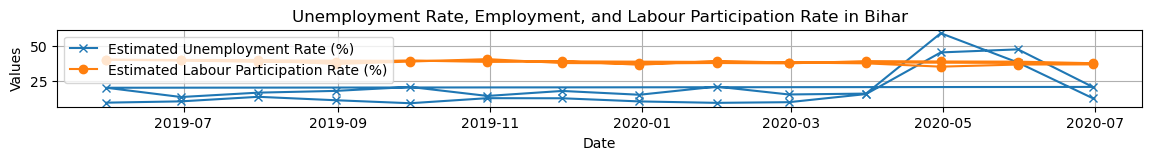

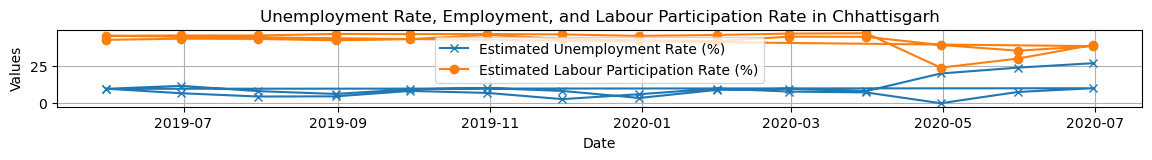

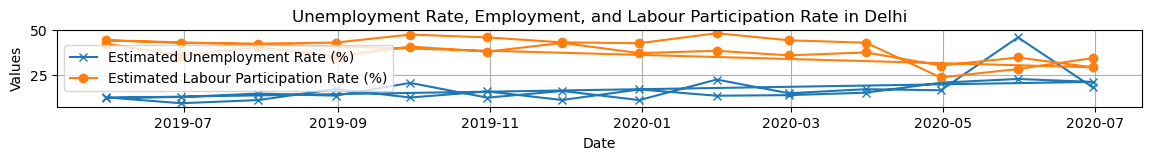

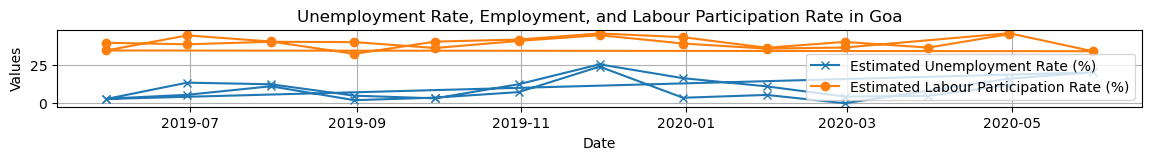

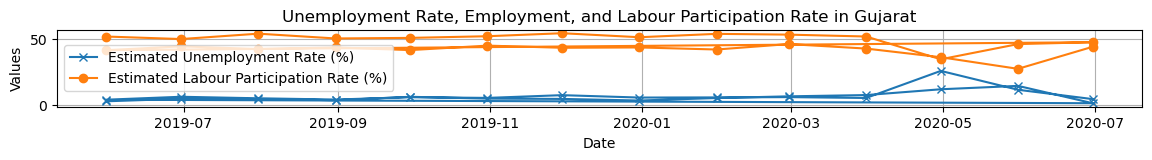

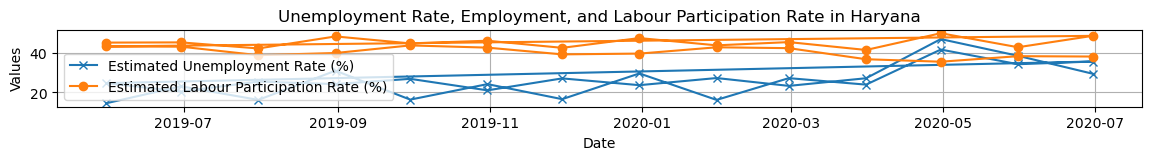

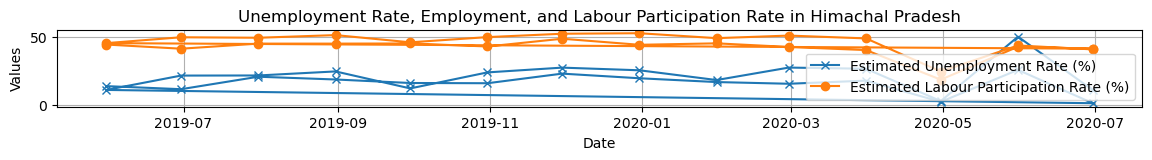

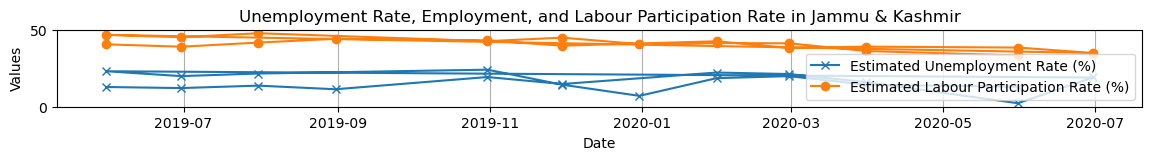

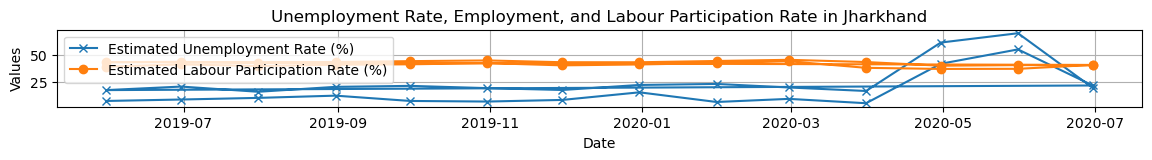

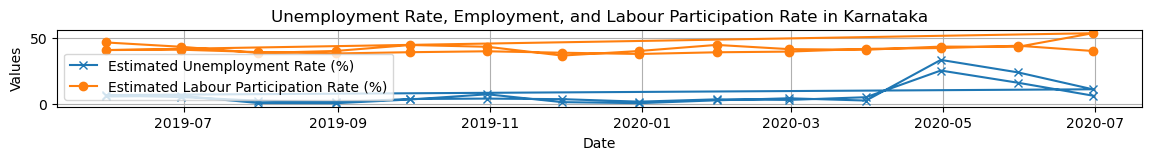

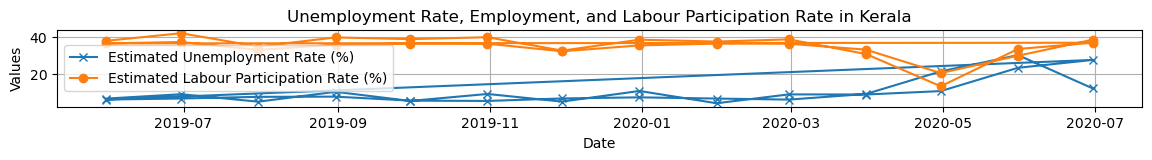

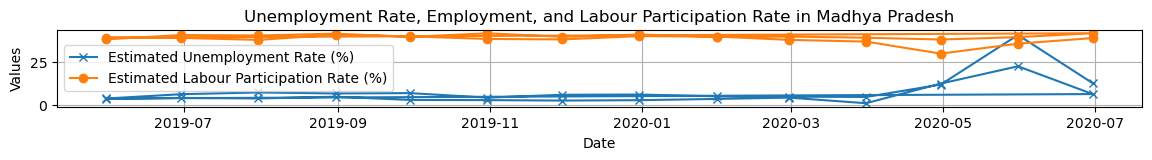

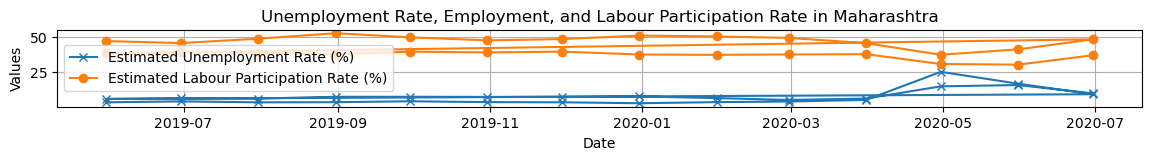

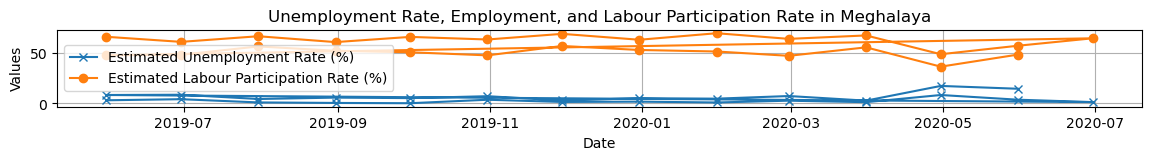

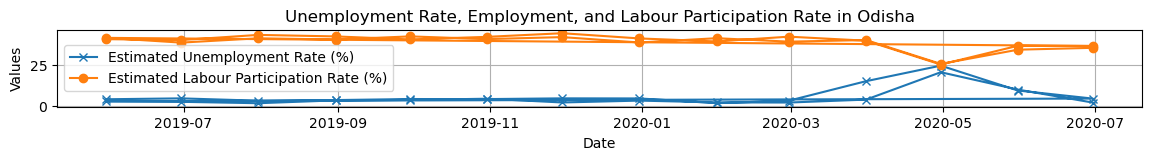

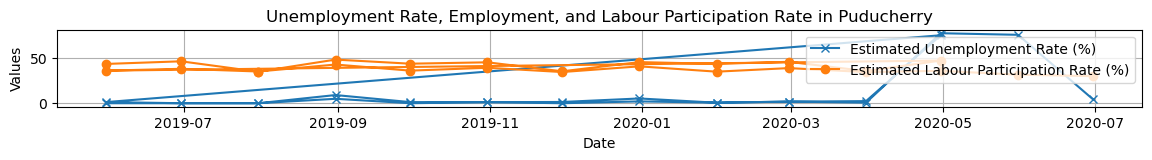

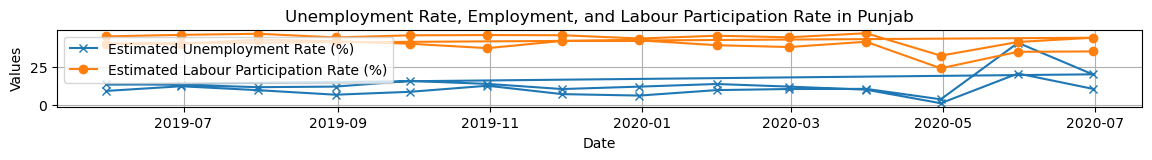

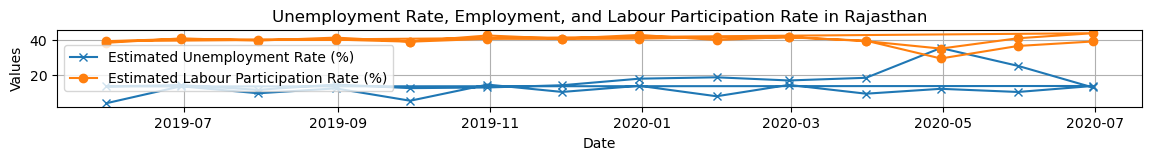

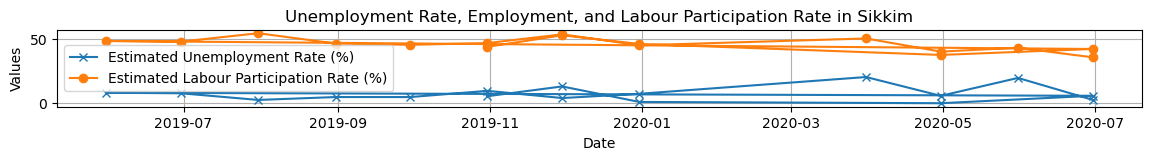

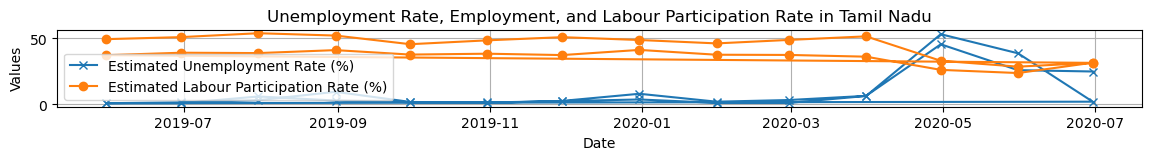

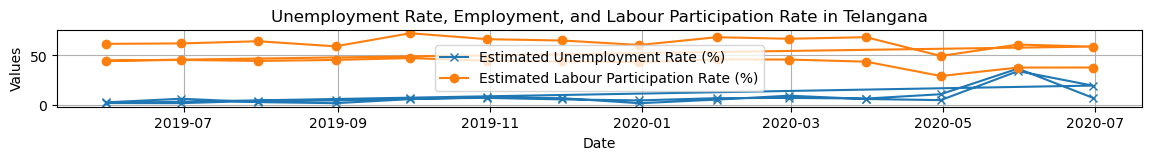

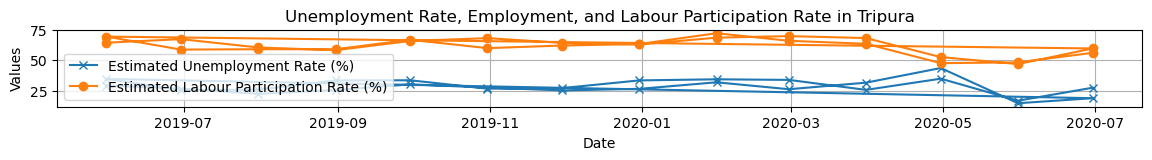

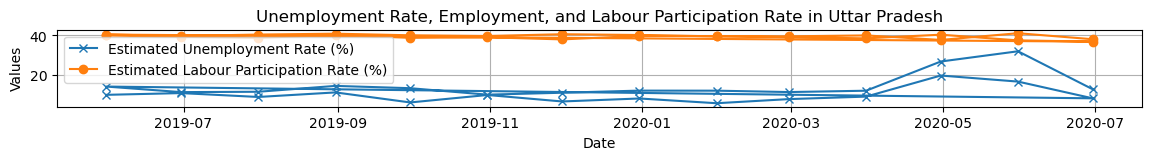

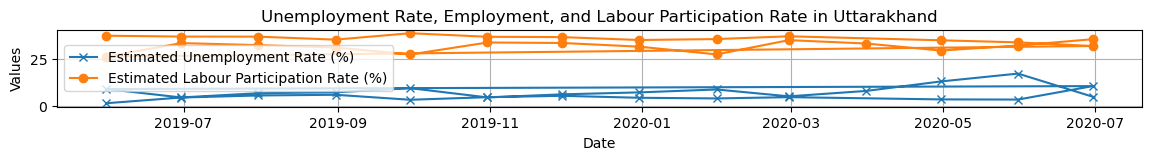

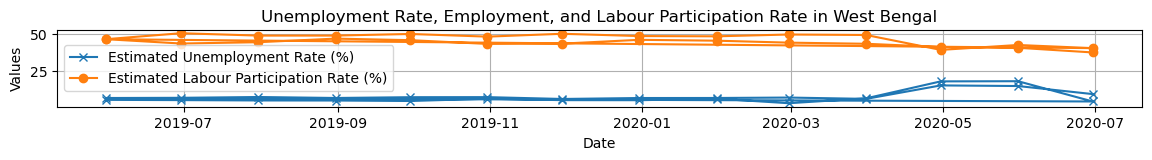

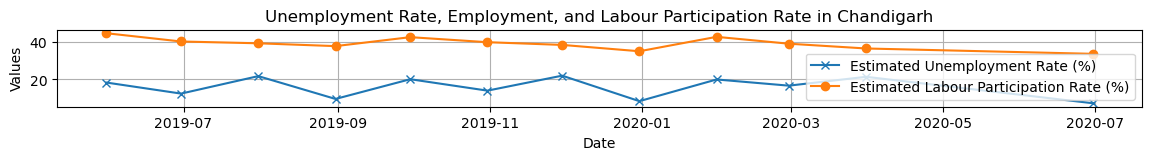

In [18]:
for region in regions:
    region_df = unemployment_df[unemployment_df['Region'] == region]
    plt.figure(figsize=(14, 1))
    plt.plot(region_df['Date'], region_df['Estimated Unemployment Rate (%)'], marker='x', label='Estimated Unemployment Rate (%)')
    #plt.plot(region_df['Date'], region_df['Estimated Employed'], marker='o', label='Estimated Employed')
    plt.plot(region_df['Date'], region_df['Estimated Labour Participation Rate (%)'], marker='o', label='Estimated Labour Participation Rate (%)')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Unemployment Rate, Employment, and Labour Participation Rate in {region}')
    plt.legend()
    plt.grid(True)
    plt.show()

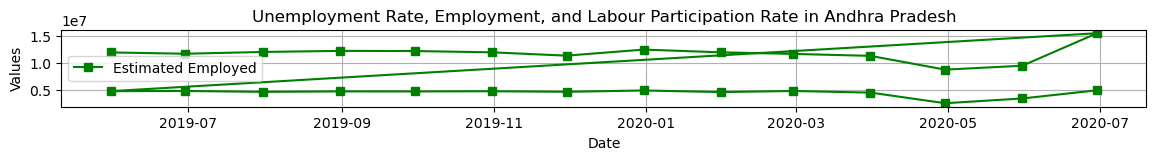

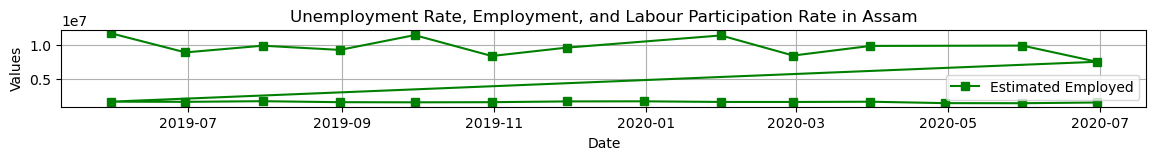

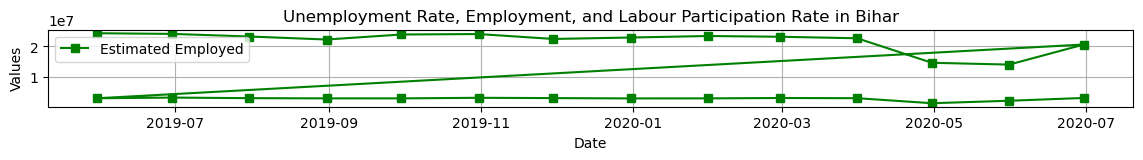

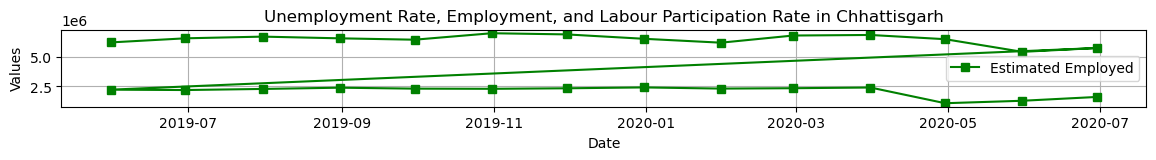

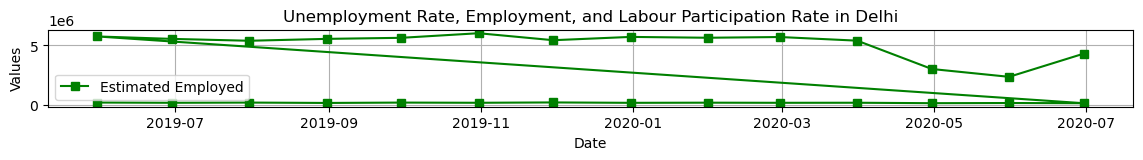

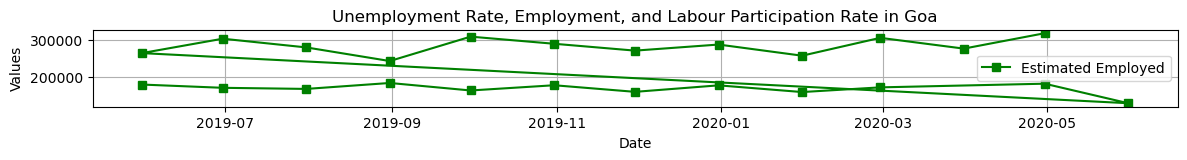

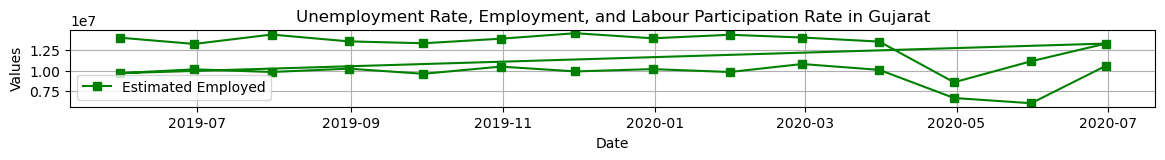

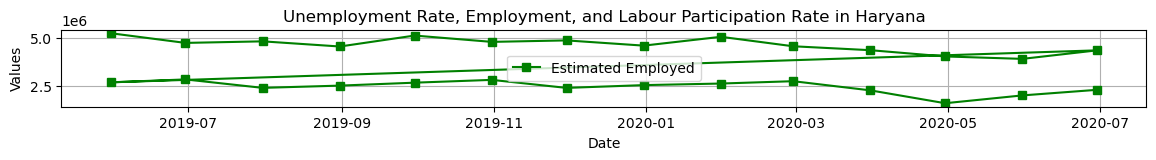

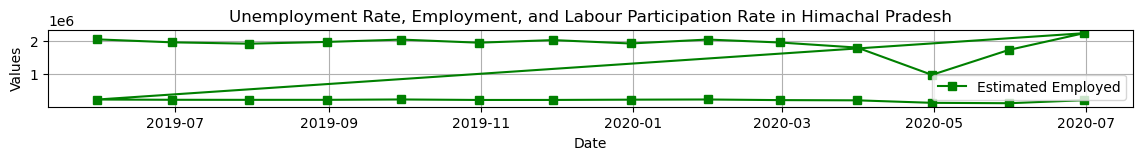

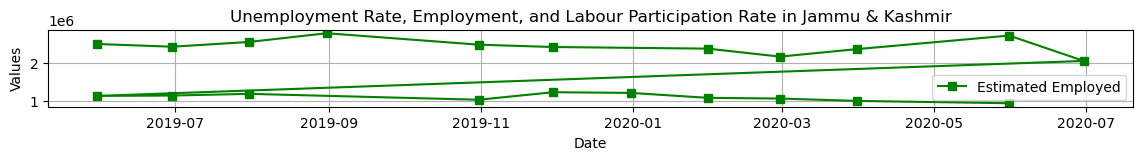

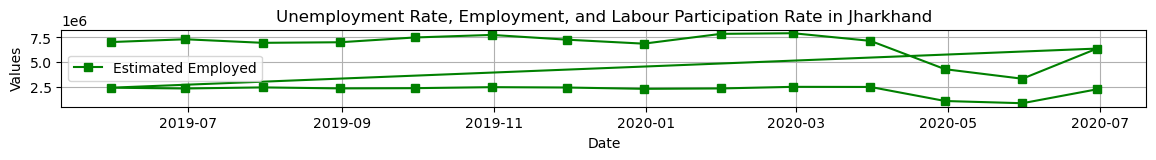

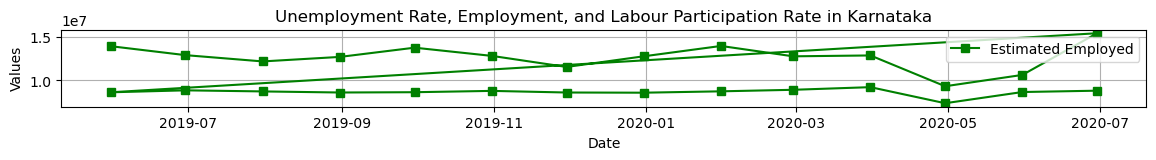

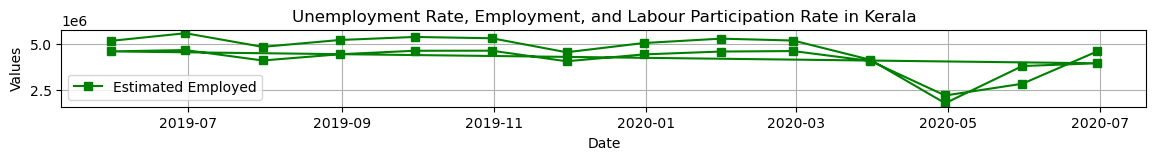

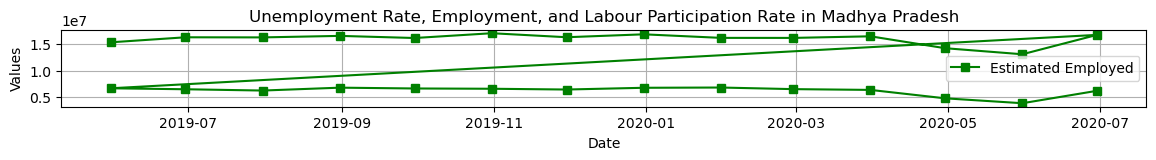

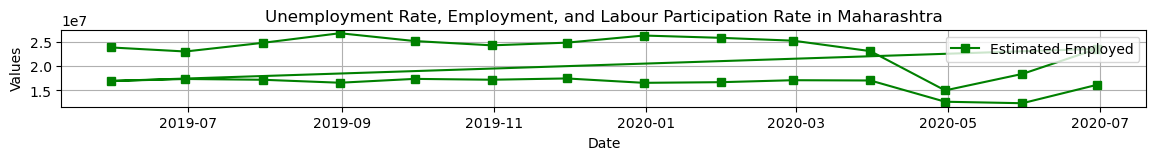

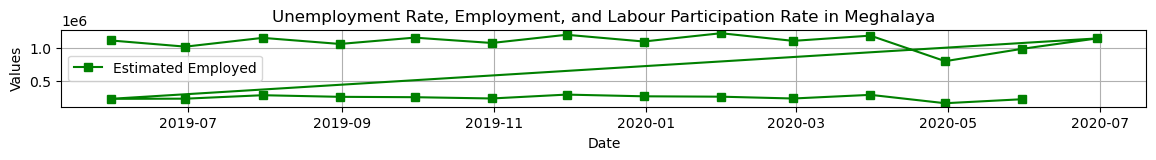

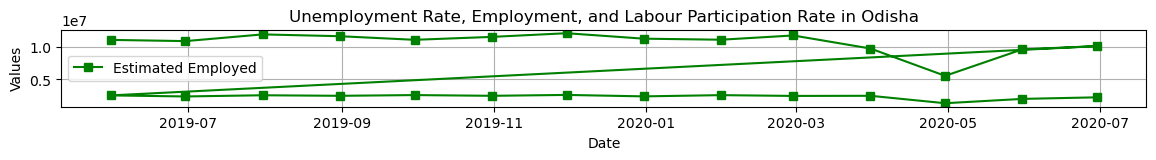

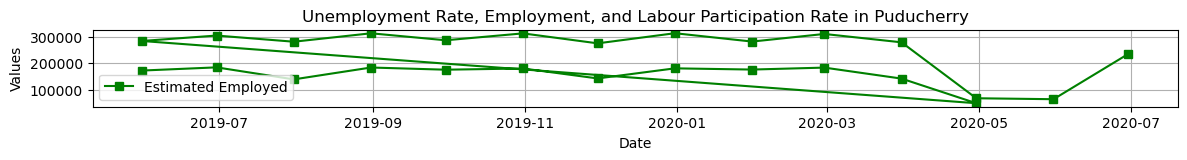

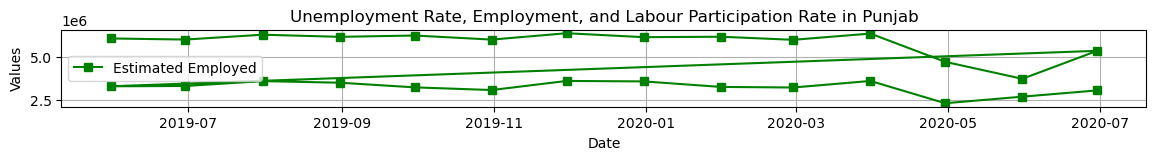

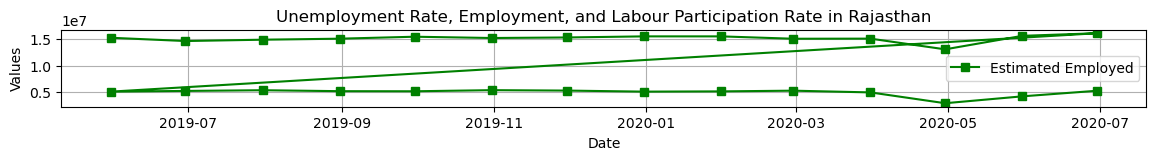

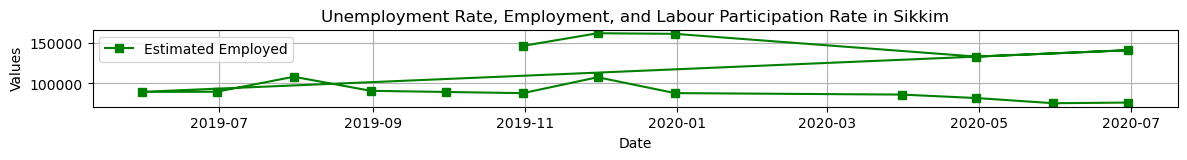

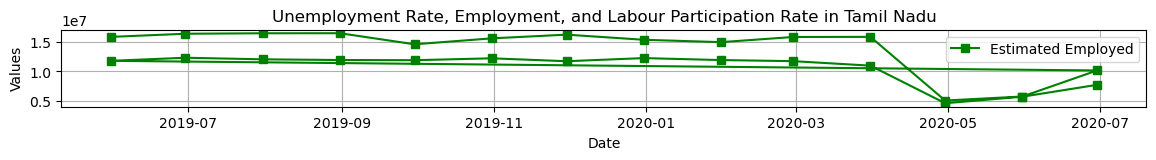

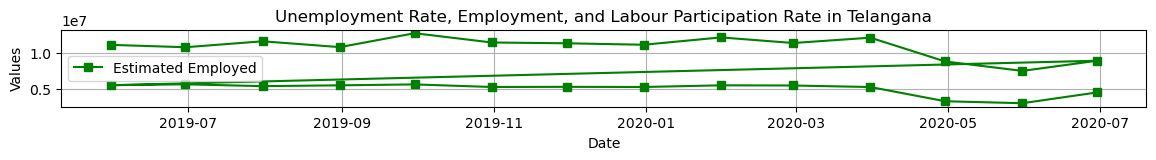

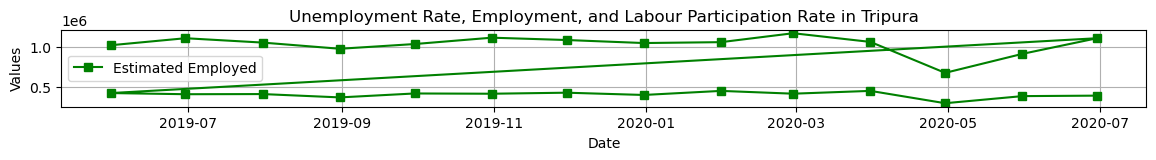

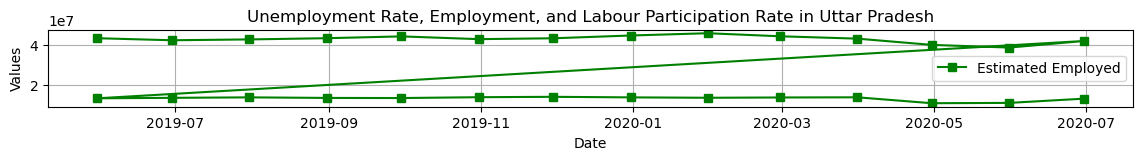

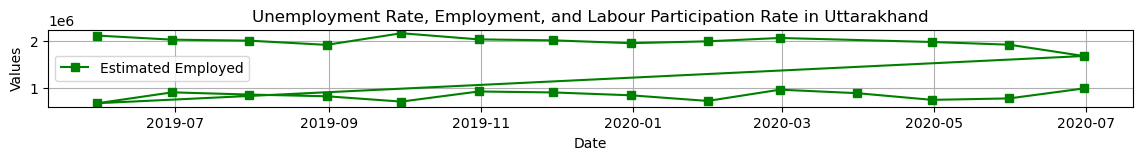

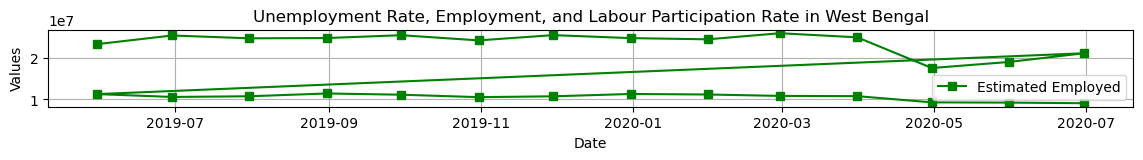

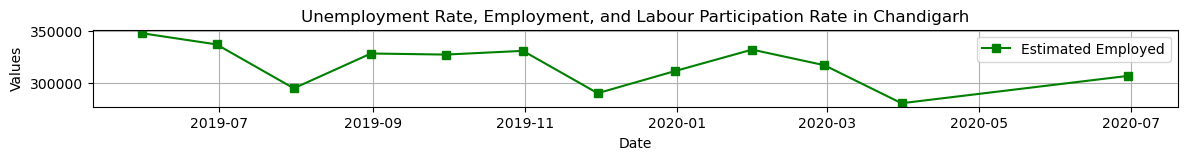

In [19]:
for region in regions:
    region_df = unemployment_df[unemployment_df['Region'] == region]
    plt.figure(figsize=(14, 1))
    plt.plot(region_df['Date'], region_df['Estimated Employed'], marker='s',color='green', label='Estimated Employed')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.title(f'Unemployment Rate, Employment, and Labour Participation Rate in {region}')
    plt.legend()
    plt.grid(True)
    plt.show()

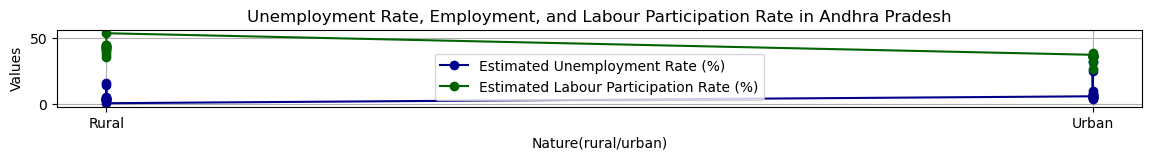

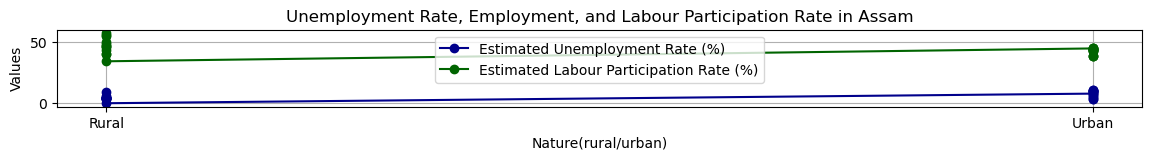

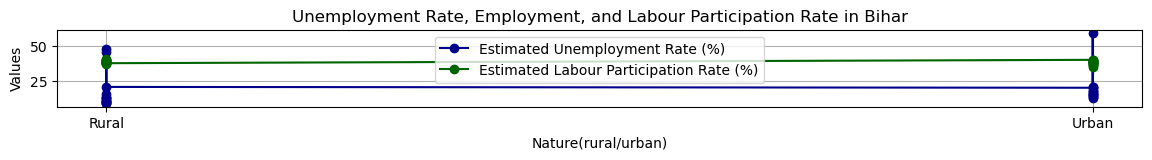

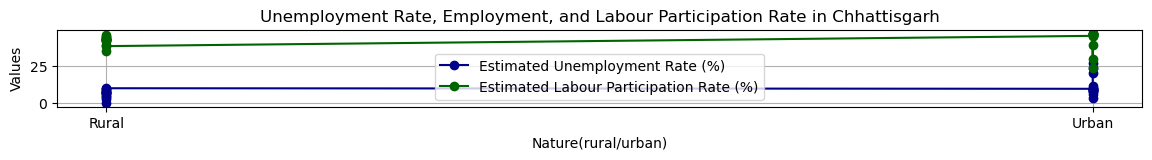

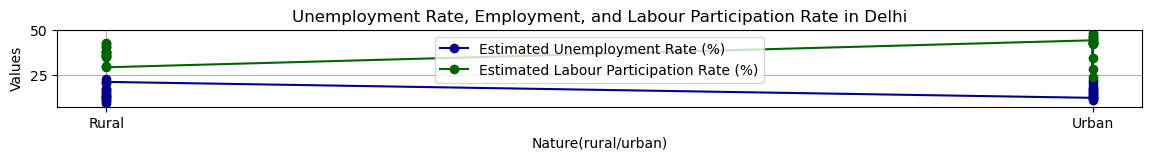

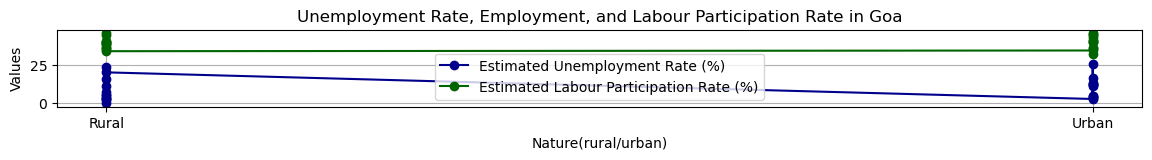

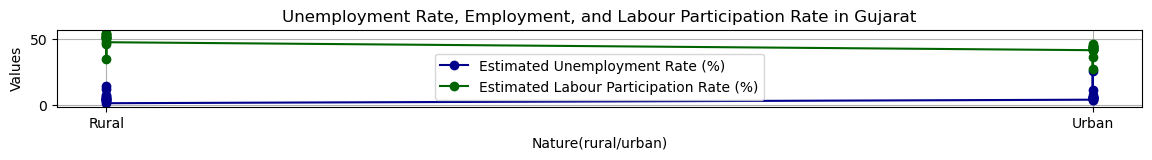

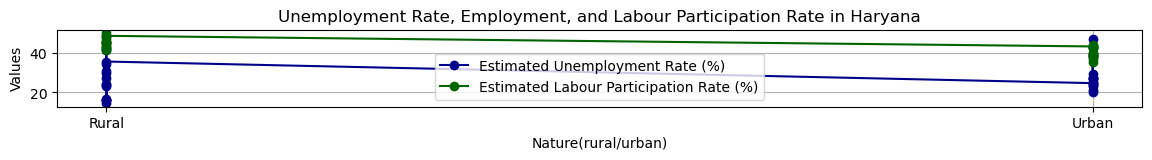

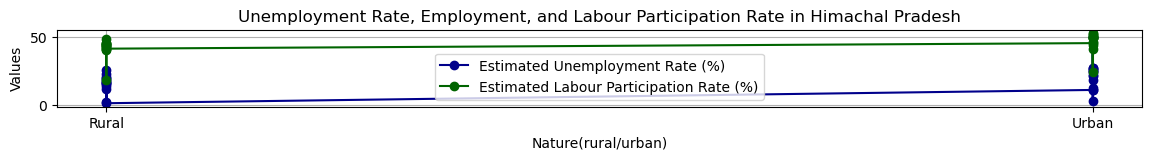

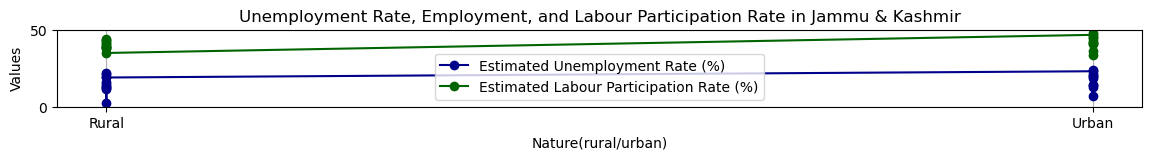

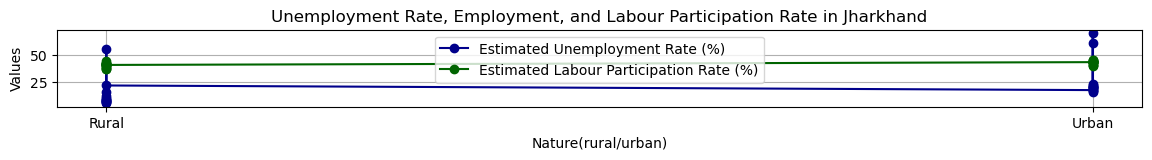

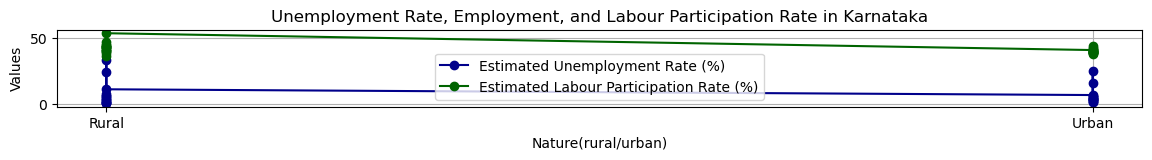

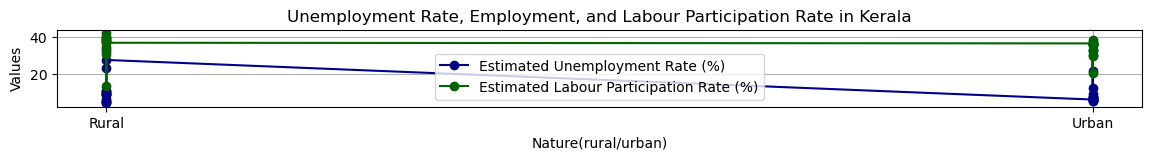

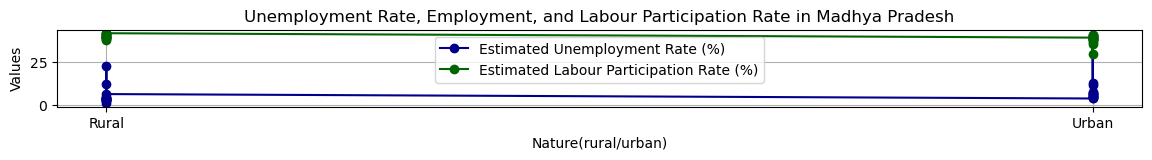

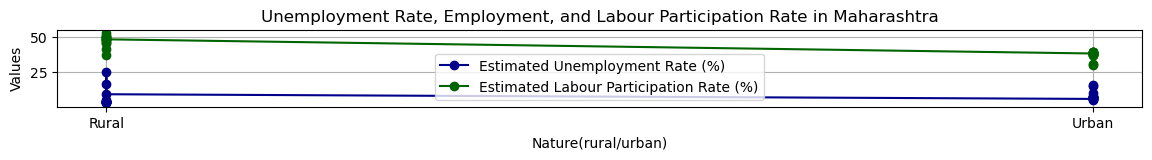

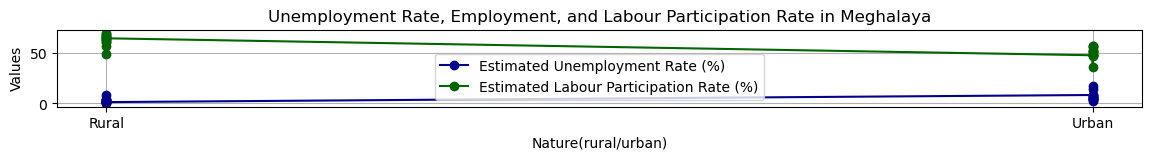

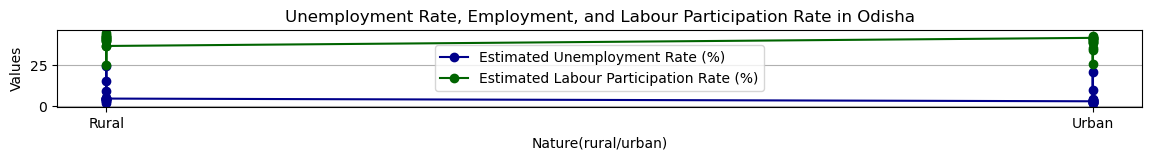

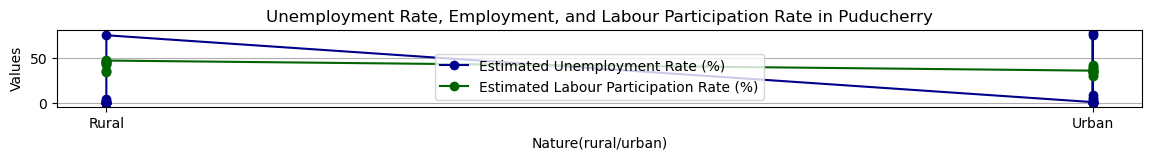

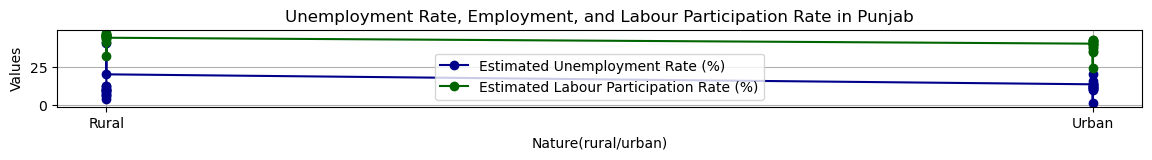

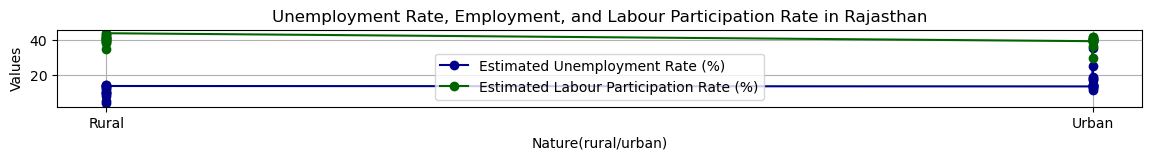

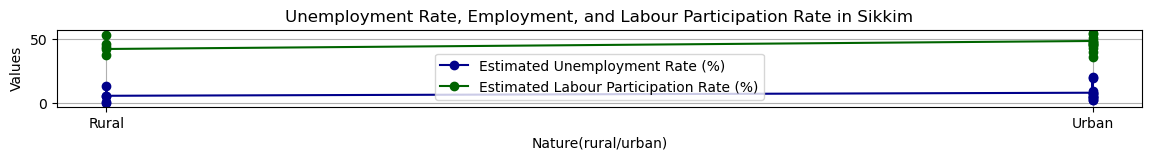

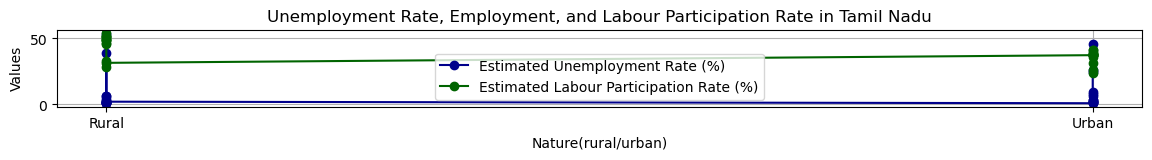

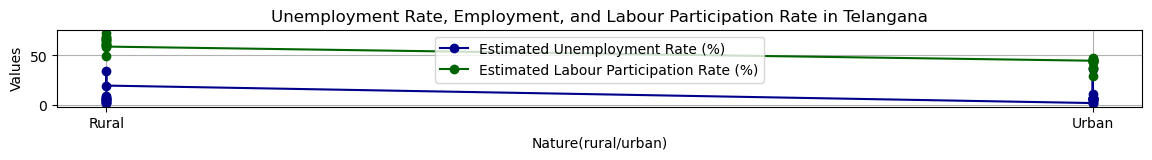

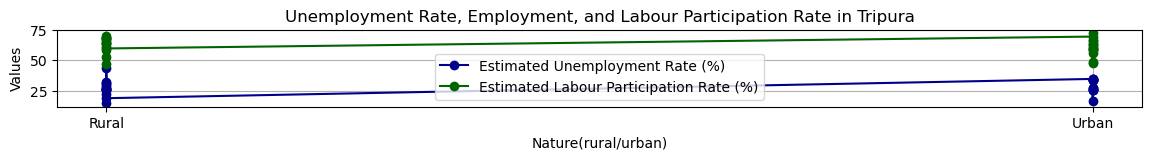

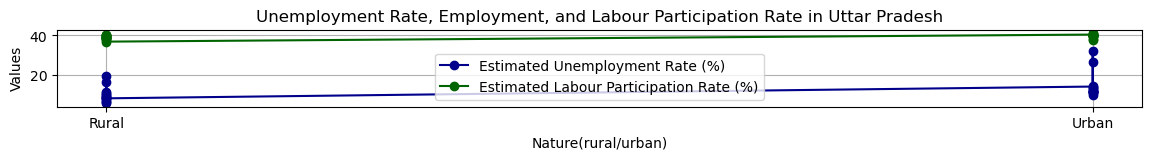

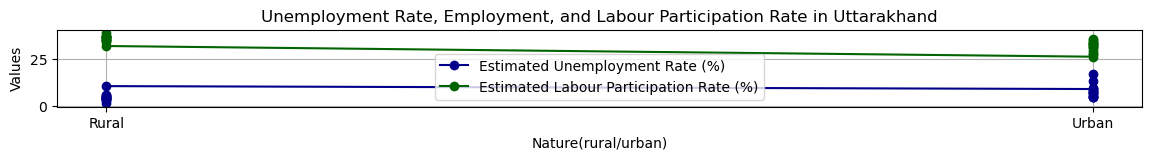

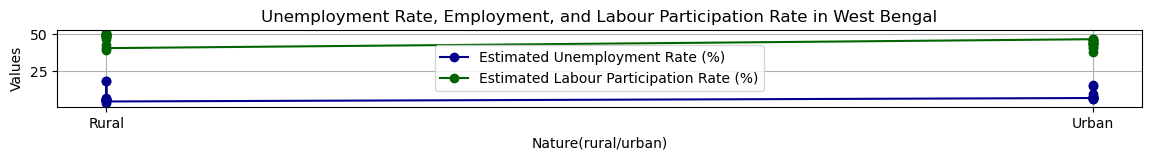

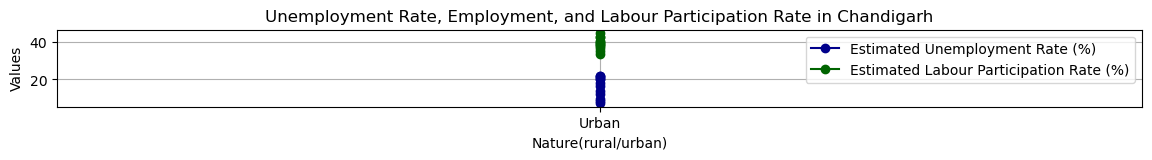

In [20]:
for region in regions:
    region_df = unemployment_df[unemployment_df['Region'] == region]
    plt.figure(figsize=(14, 1))
    plt.plot(region_df['Area'], region_df['Estimated Unemployment Rate (%)'], marker='o',color='darkblue', label='Estimated Unemployment Rate (%)')
    #plt.plot(region_df['Area'], region_df['Estimated Employed'], marker='o', label='Estimated Employed')
    plt.plot(region_df['Area'], region_df['Estimated Labour Participation Rate (%)'], marker='o',color='darkgreen', label='Estimated Labour Participation Rate (%)')
    plt.xlabel('Nature(rural/urban)')
    plt.ylabel('Values')
    plt.title(f'Unemployment Rate, Employment, and Labour Participation Rate in {region}')
    plt.legend()
    plt.grid(True)
    plt.show()

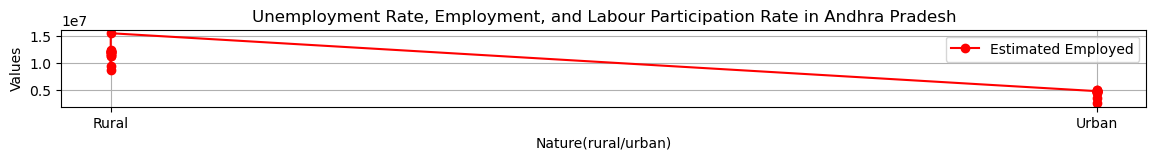

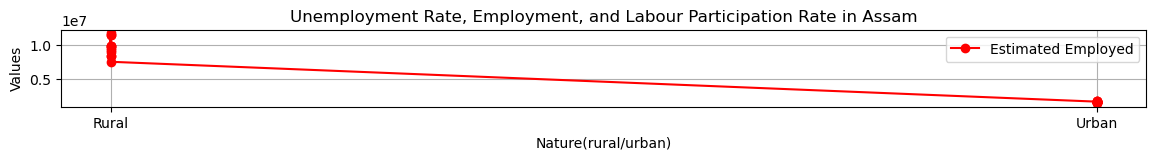

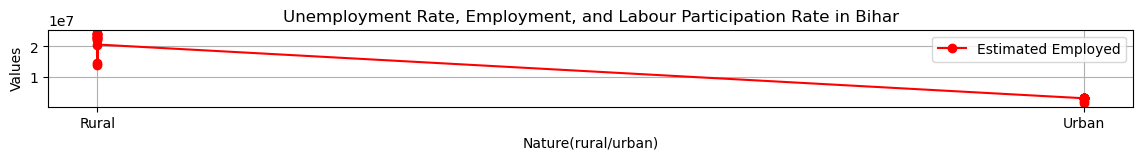

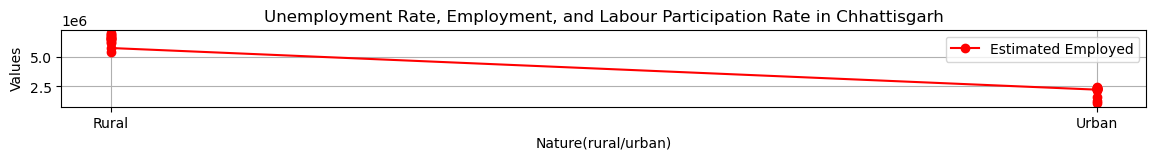

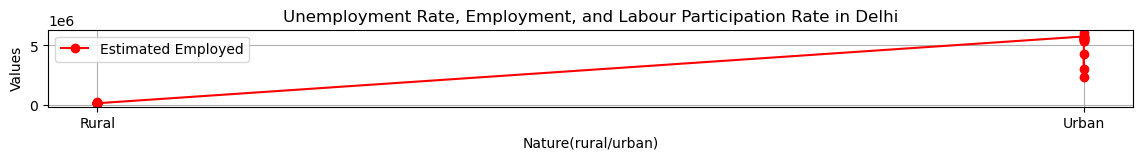

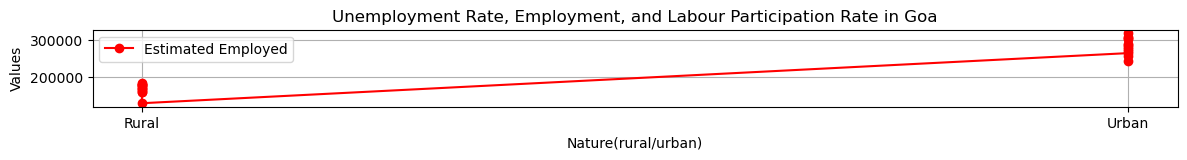

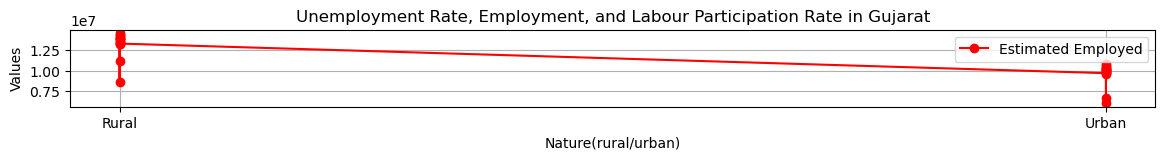

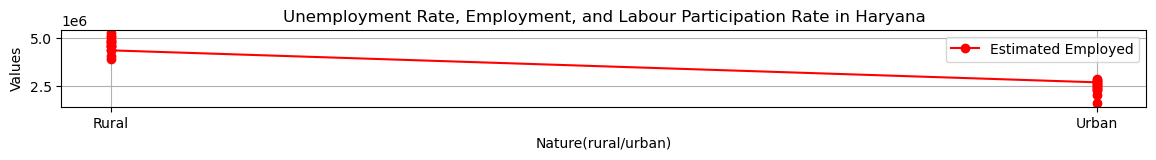

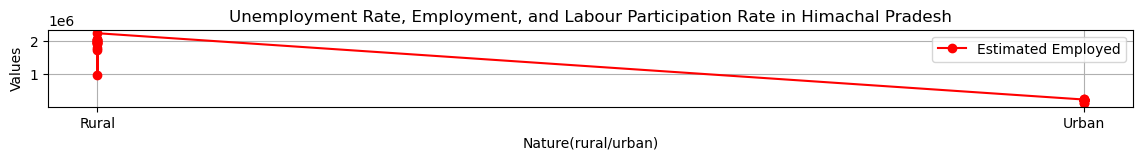

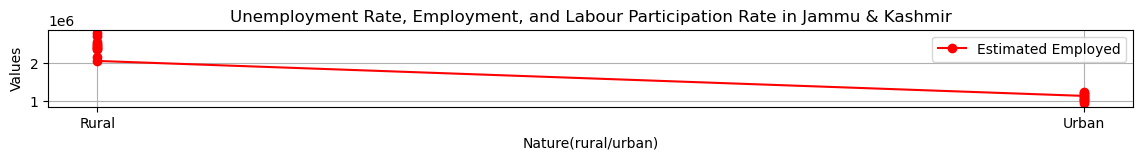

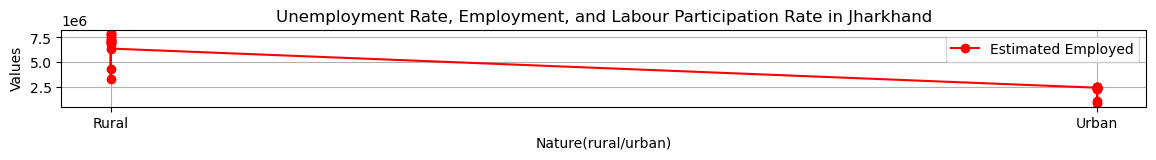

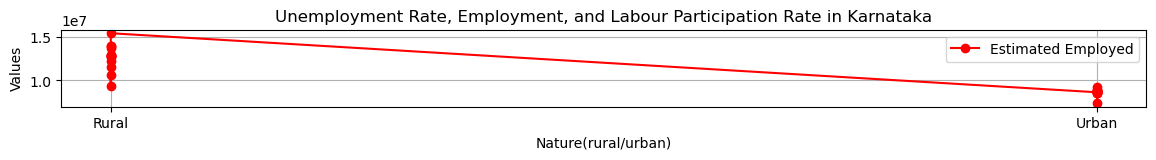

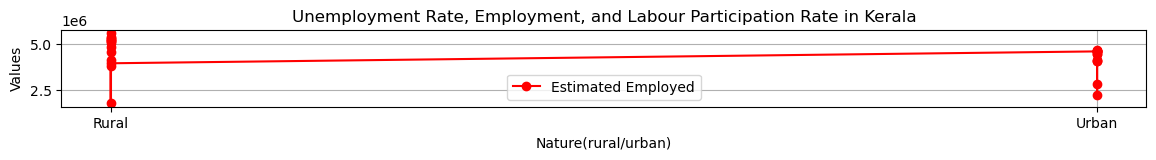

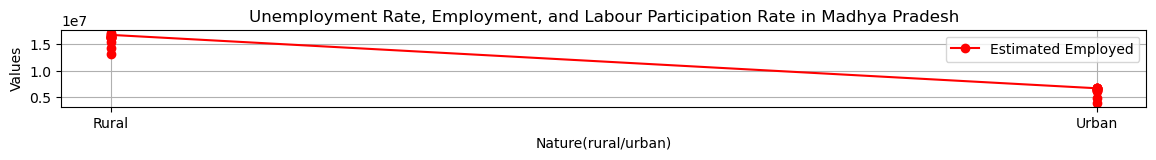

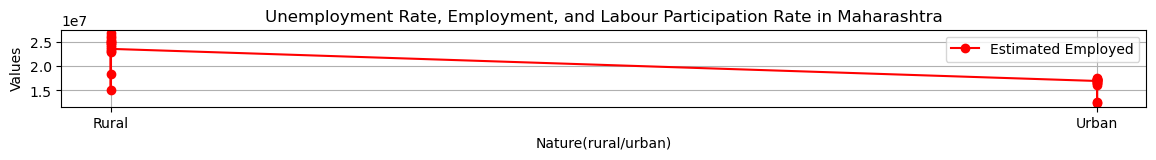

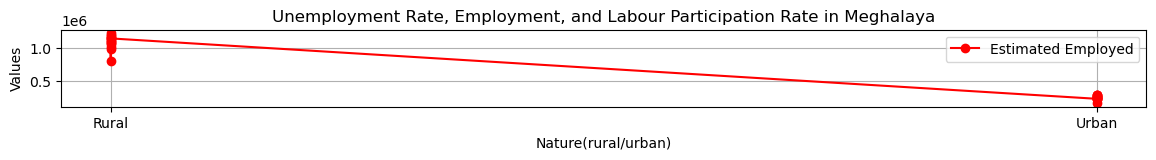

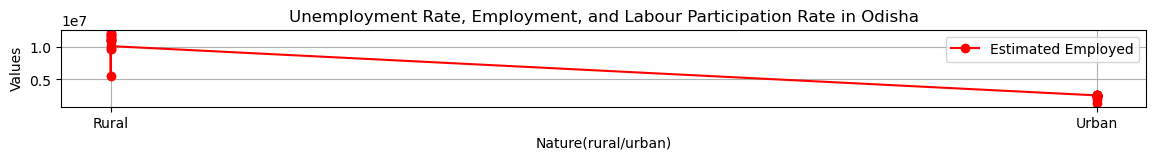

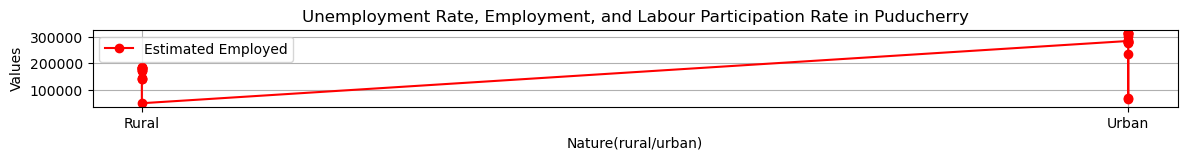

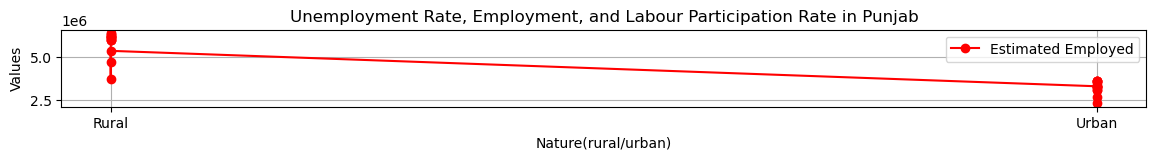

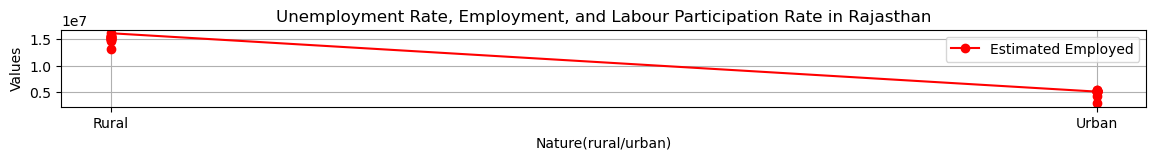

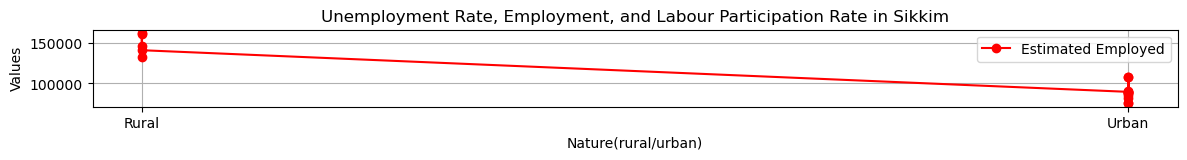

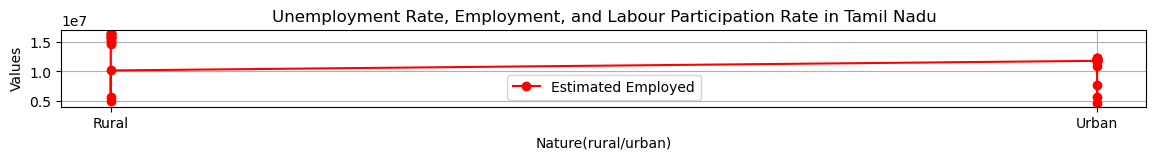

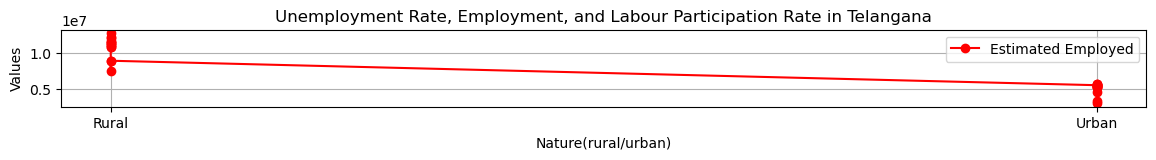

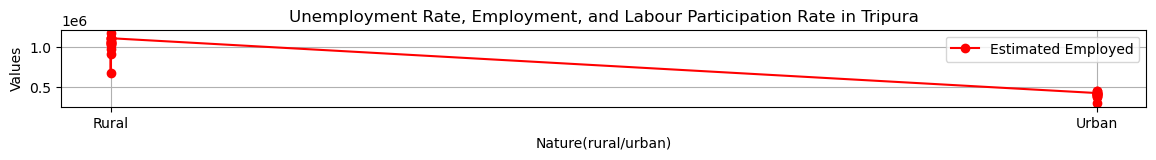

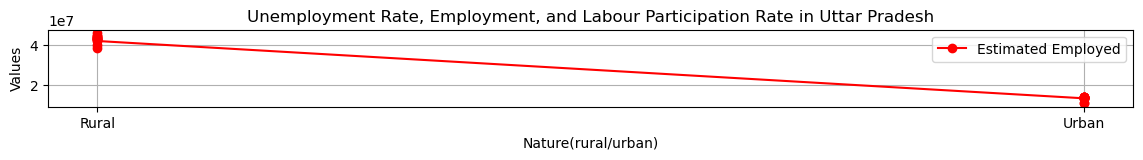

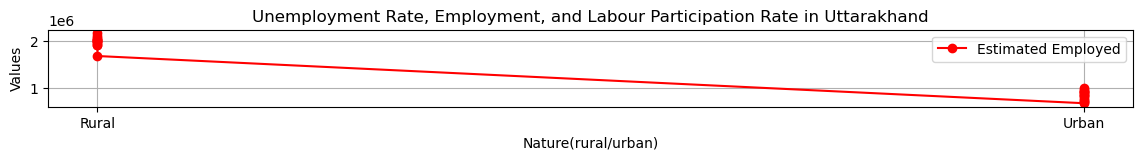

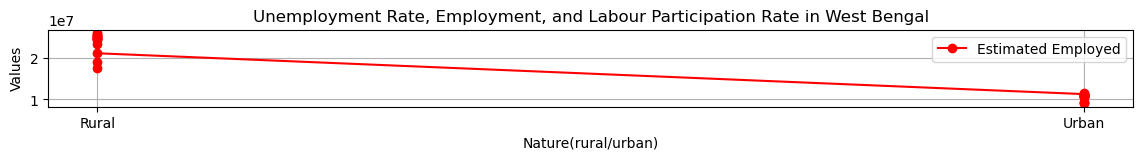

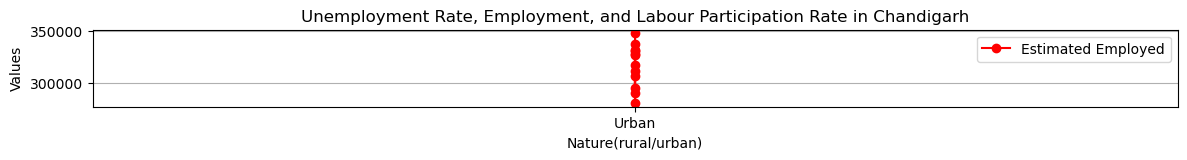

In [21]:
for region in regions:
    region_df = unemployment_df[unemployment_df['Region'] == region]
    plt.figure(figsize=(14, 1))
    plt.plot(region_df['Area'], region_df['Estimated Employed'], marker='o', color='red',label='Estimated Employed')
    plt.xlabel('Nature(rural/urban)')
    plt.ylabel('Values')
    plt.title(f'Unemployment Rate, Employment, and Labour Participation Rate in {region}')
    plt.legend()
    plt.grid(True)
    plt.show()

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

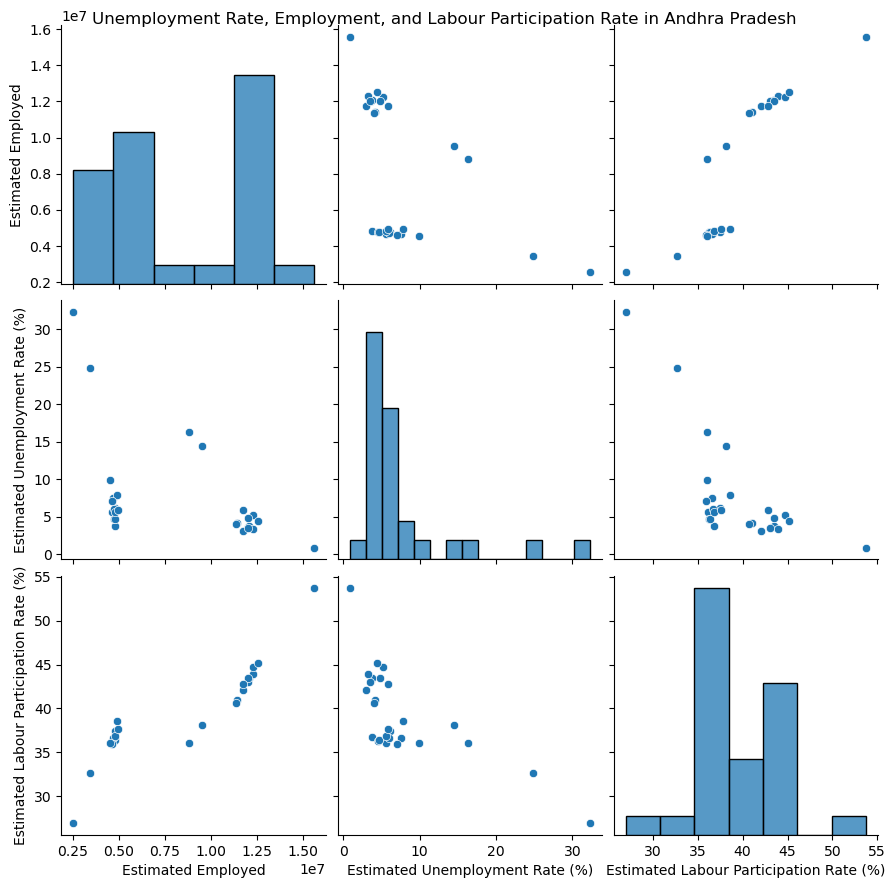

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

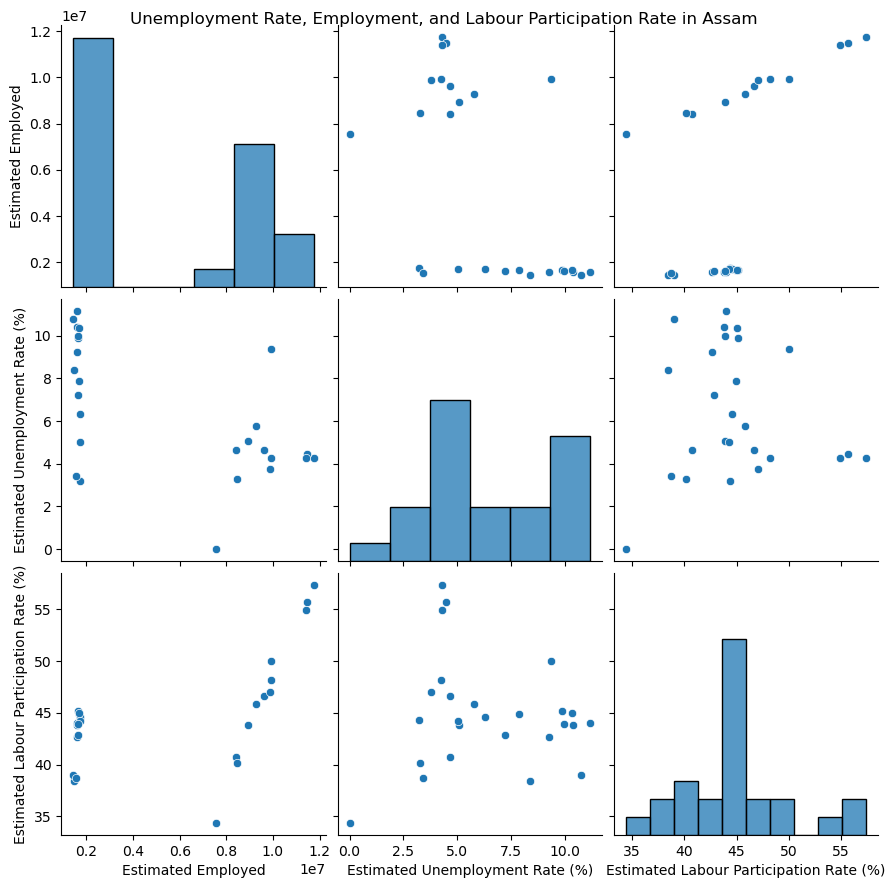

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

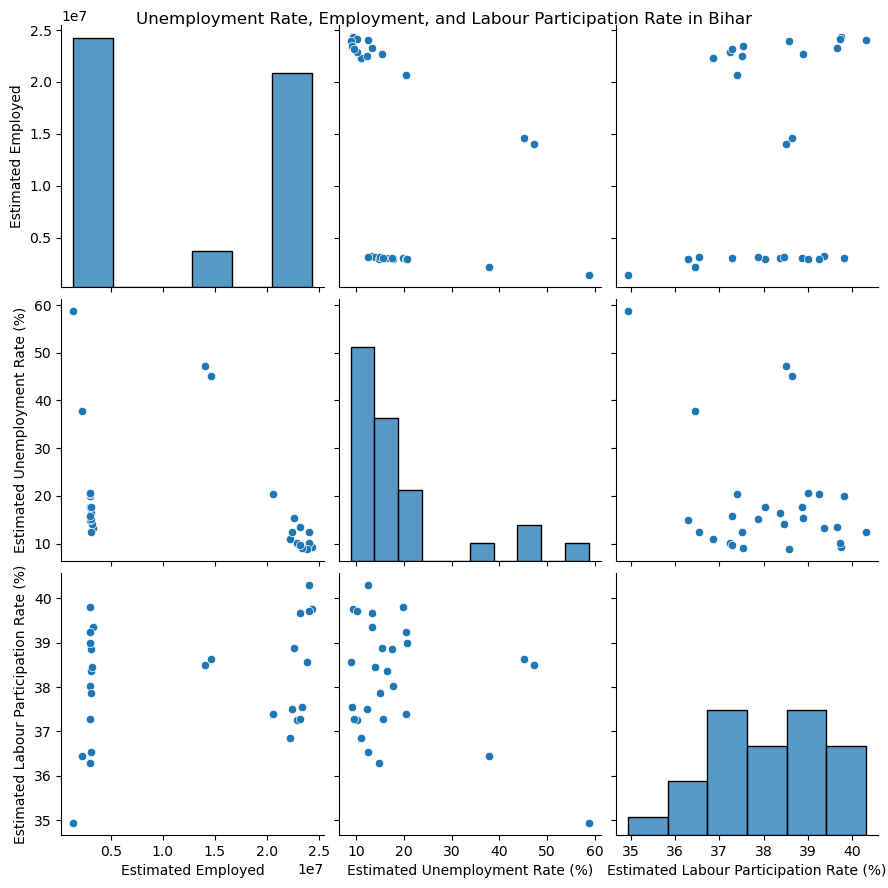

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

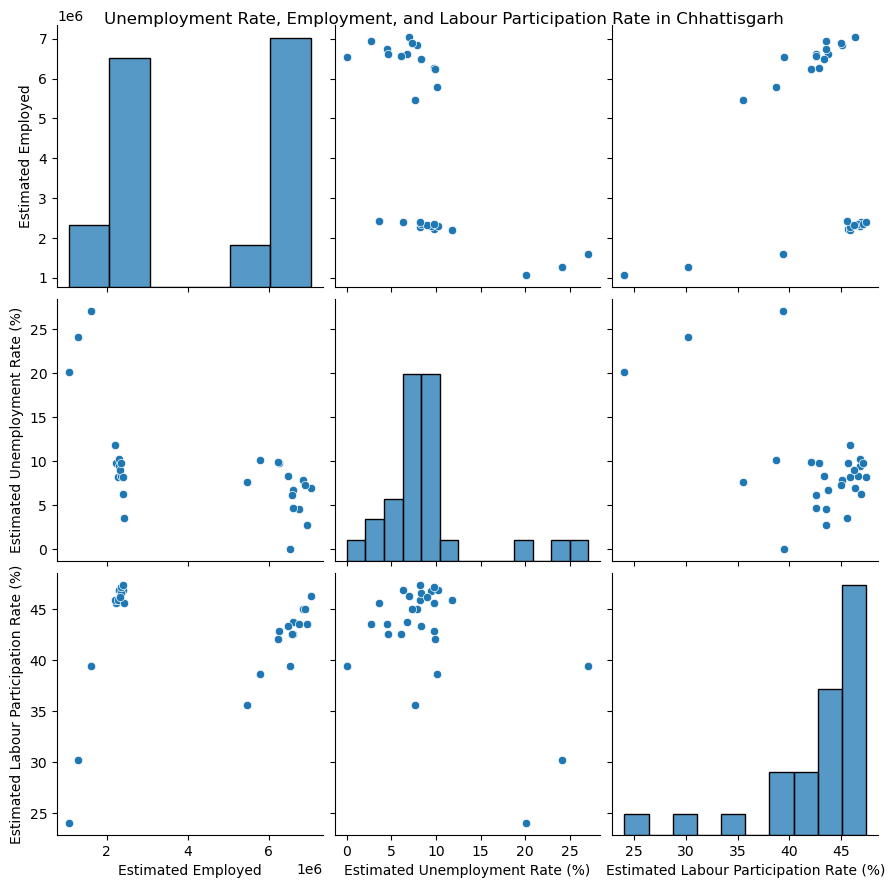

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

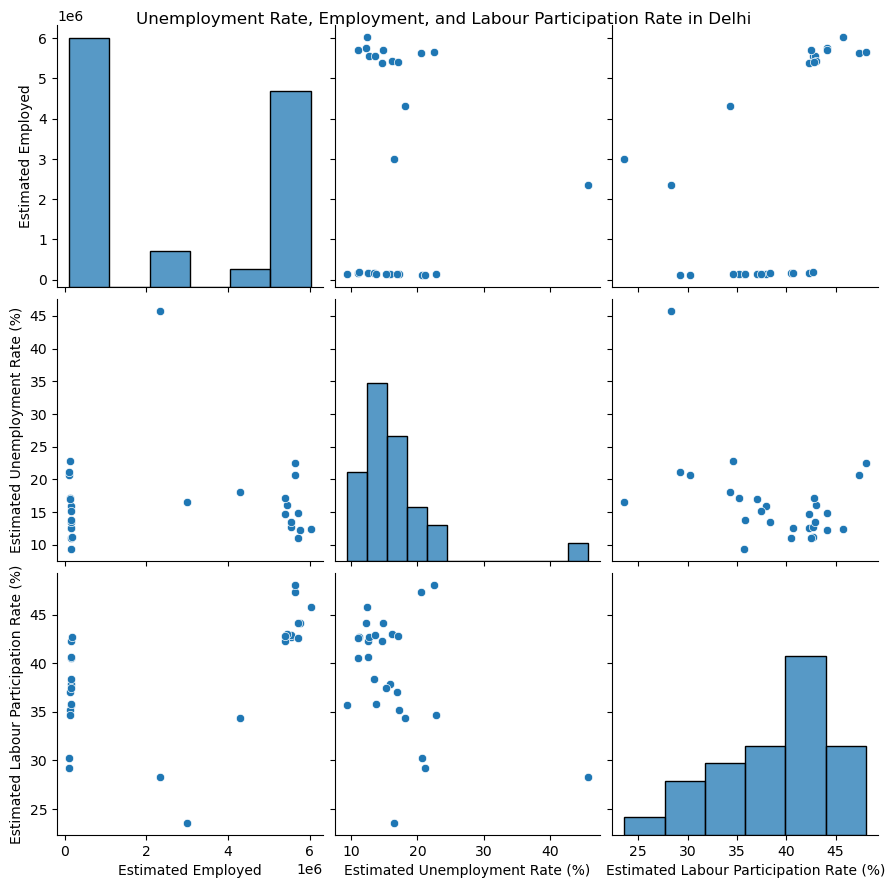

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

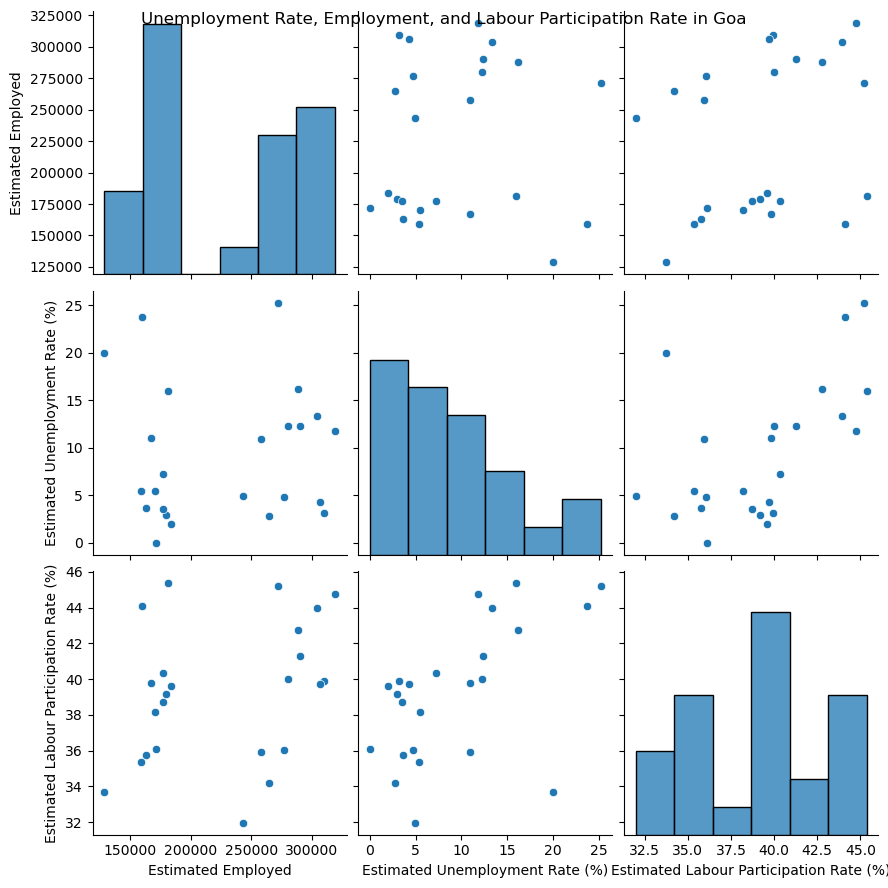

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

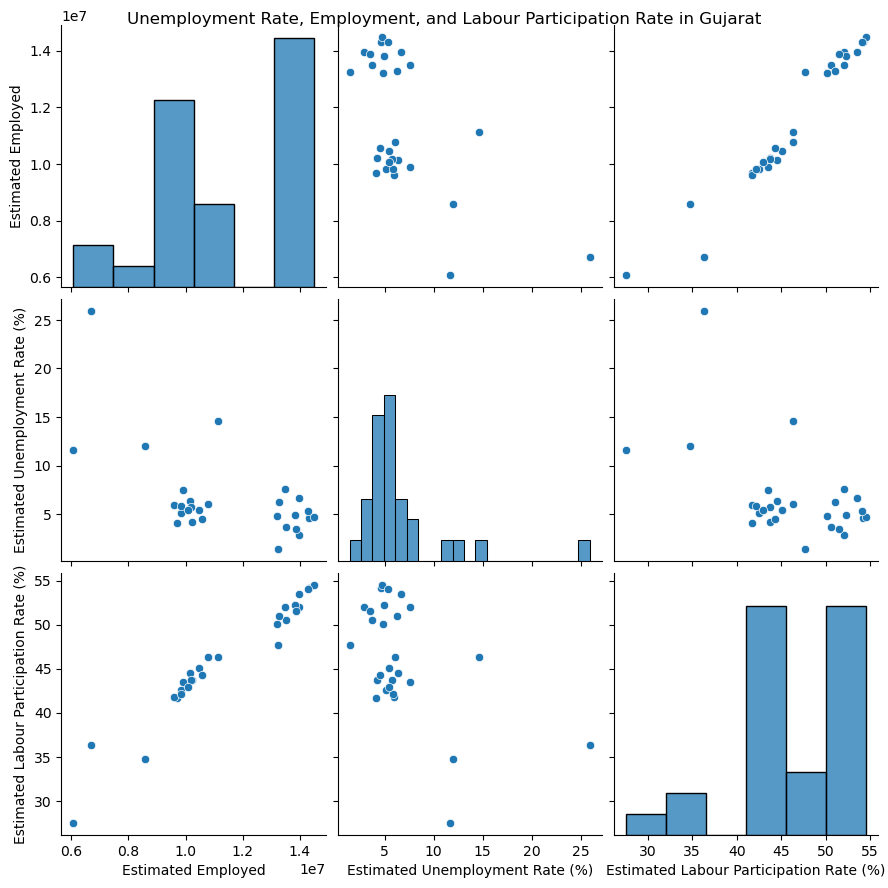

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

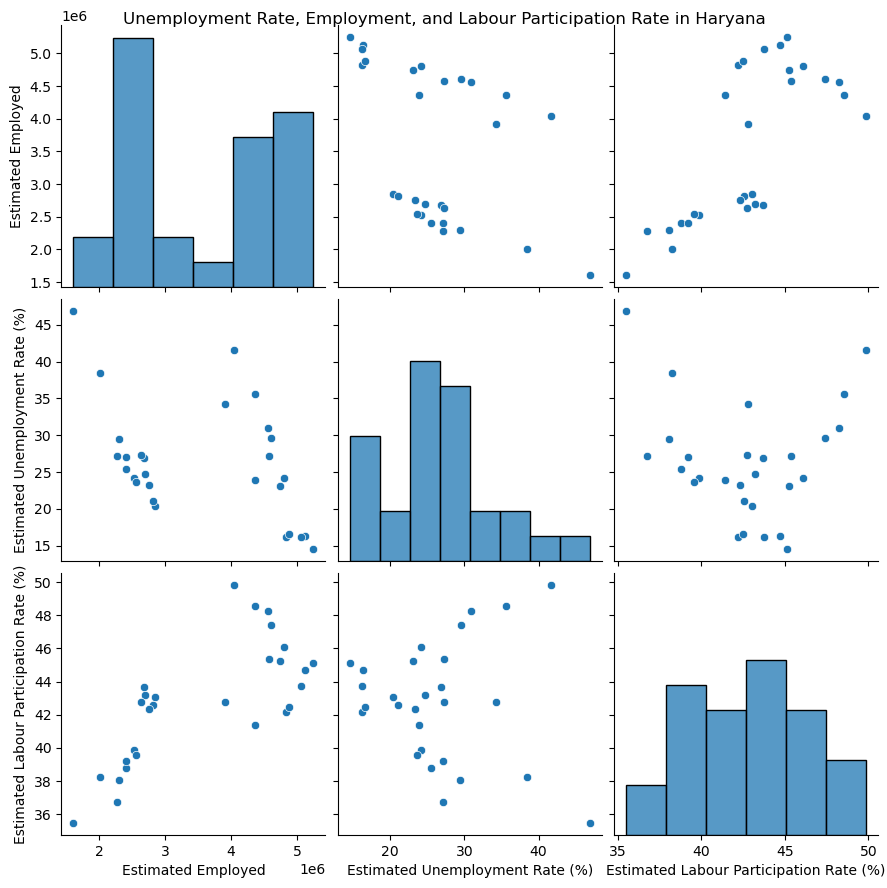

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

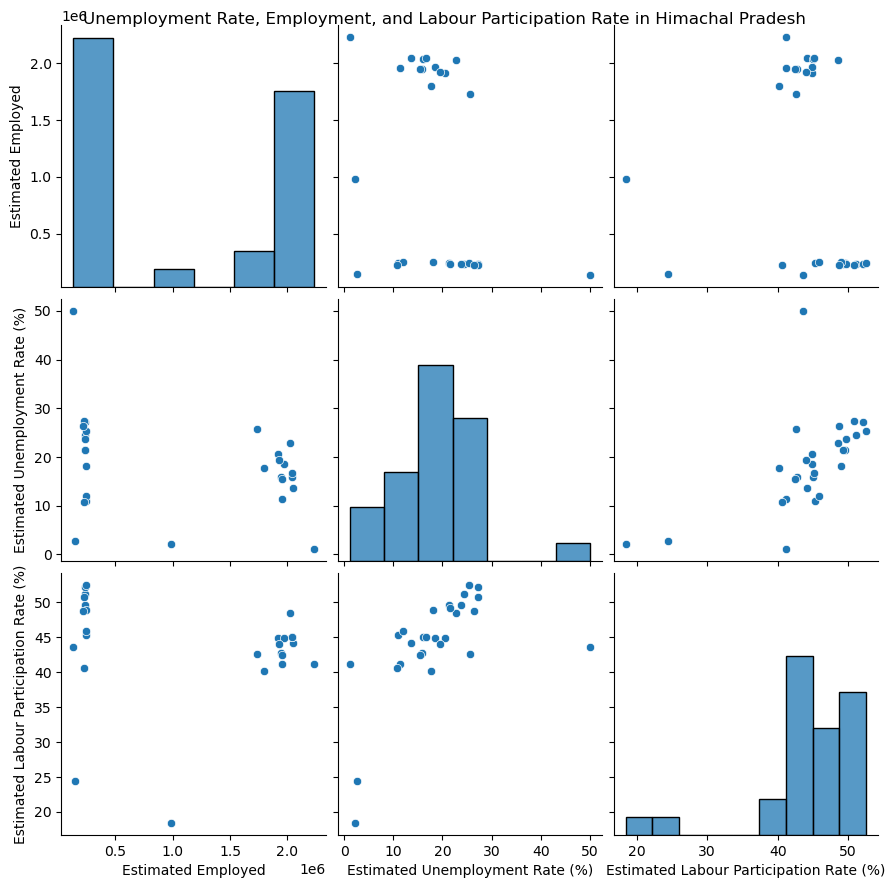

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

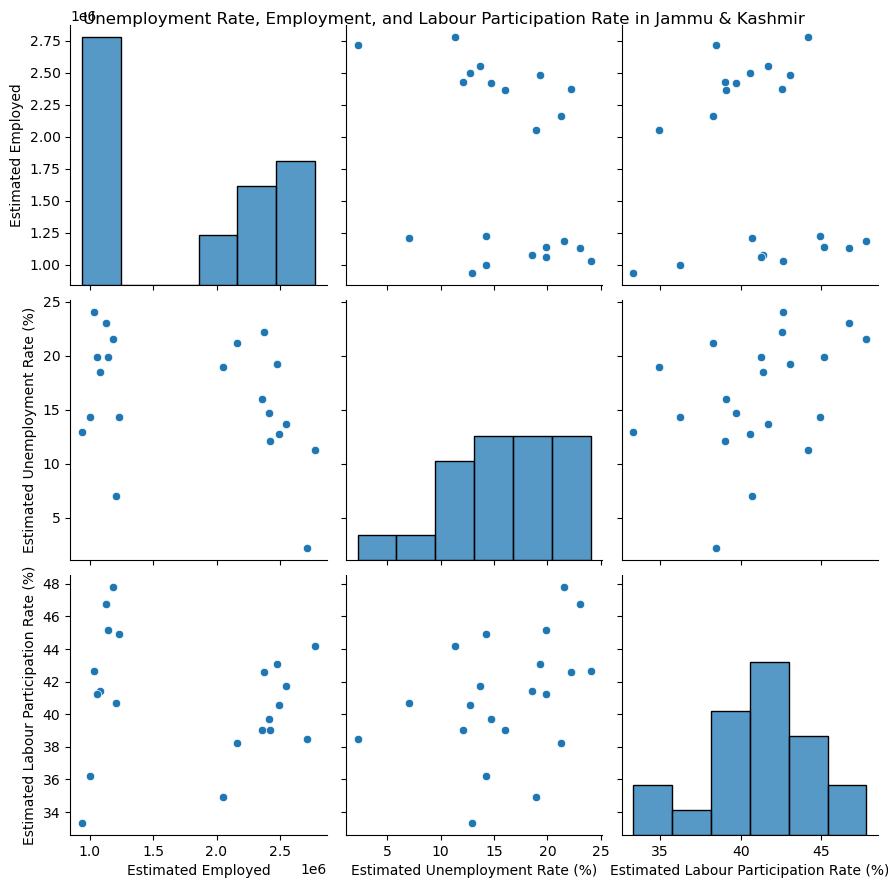

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

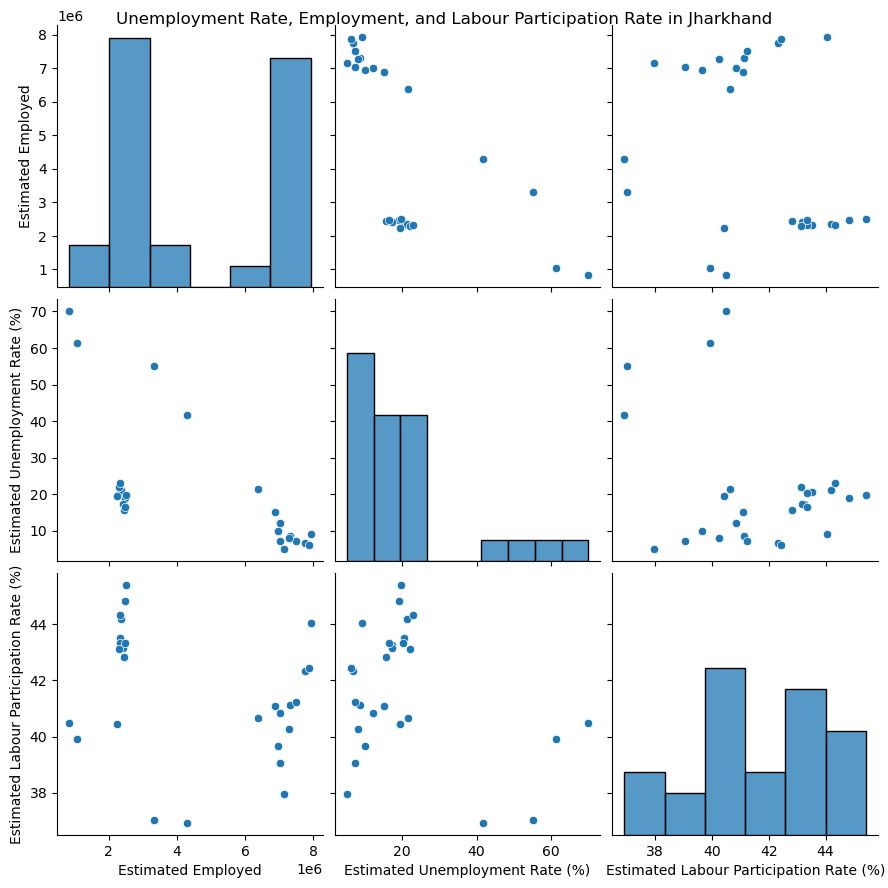

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

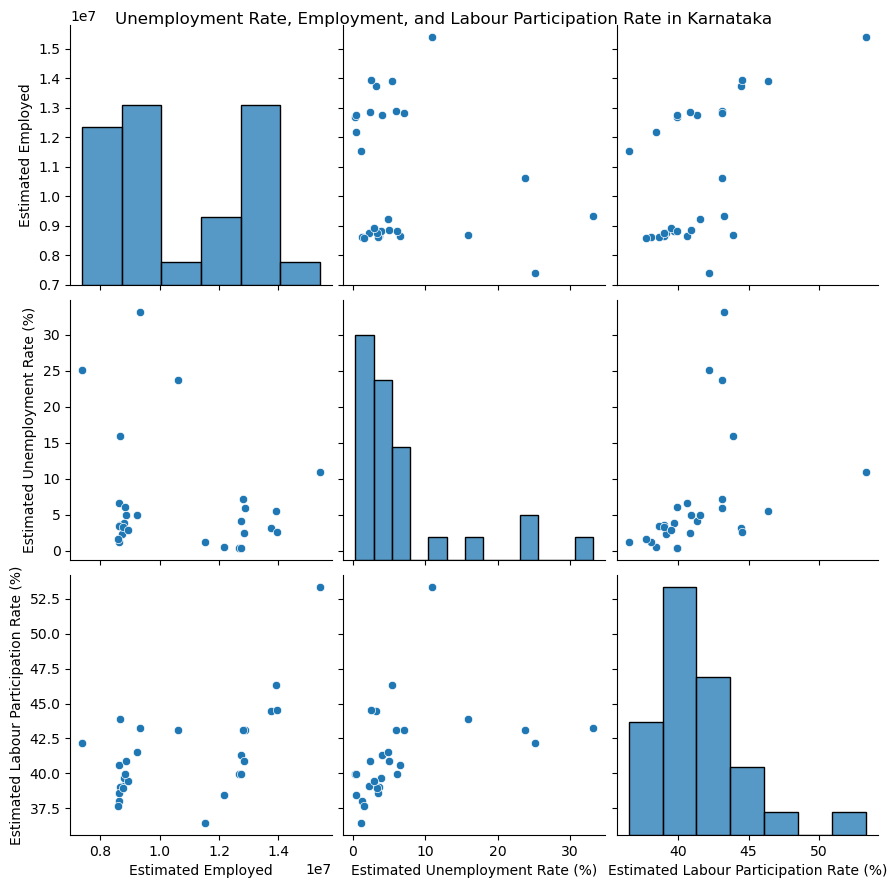

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

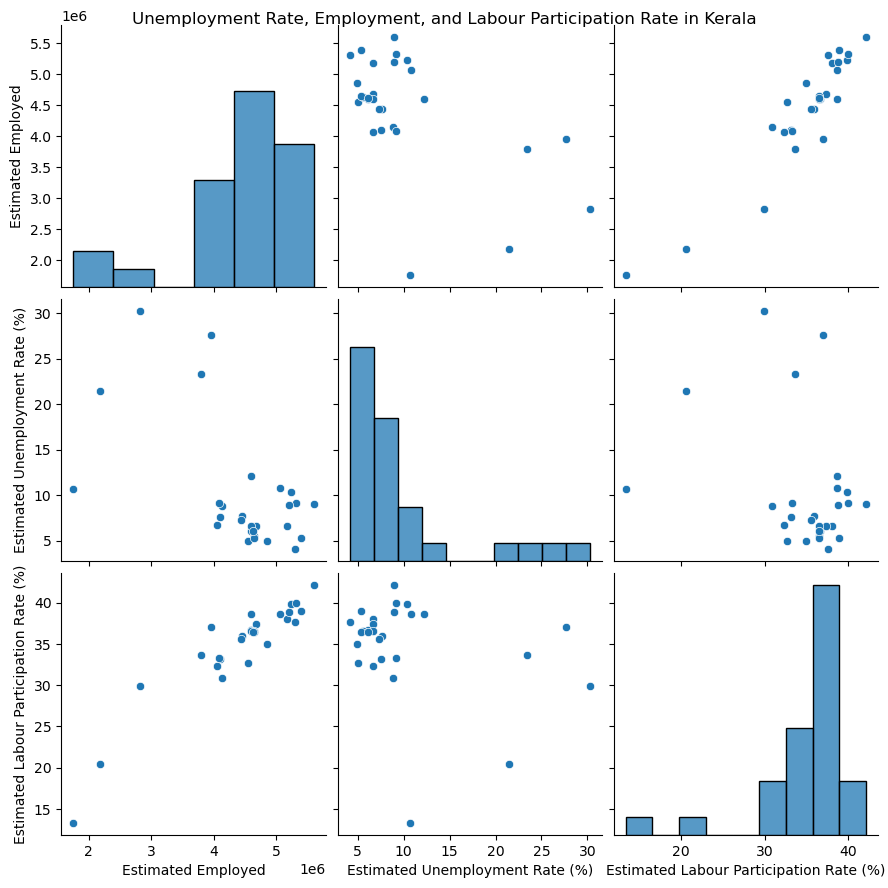

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

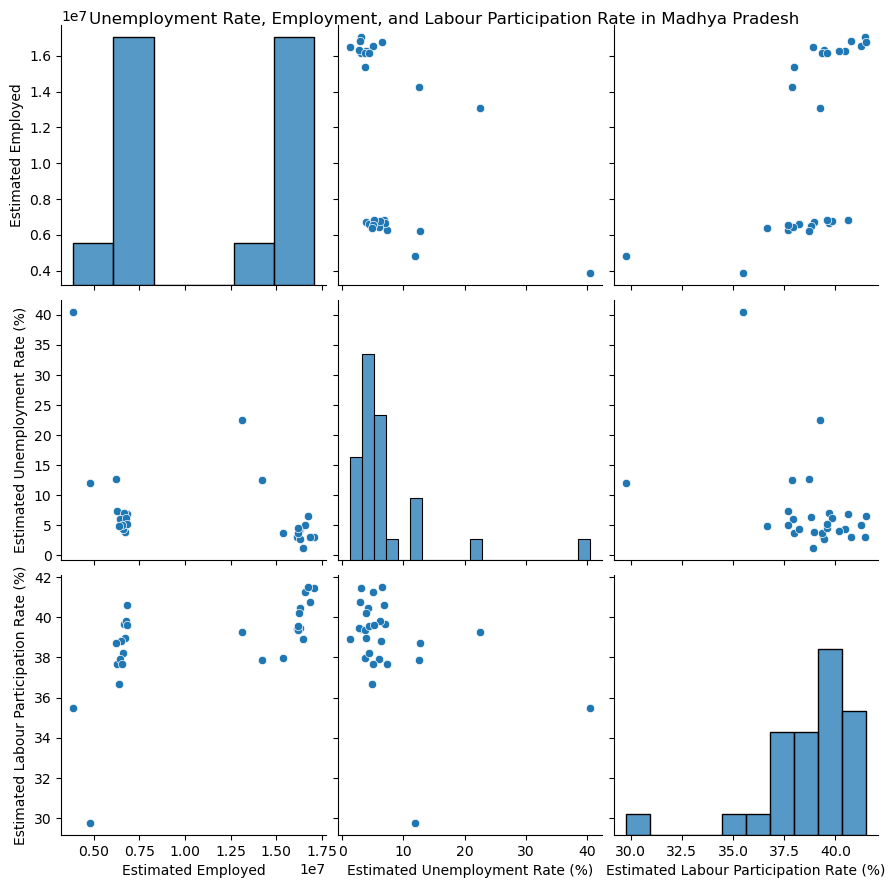

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

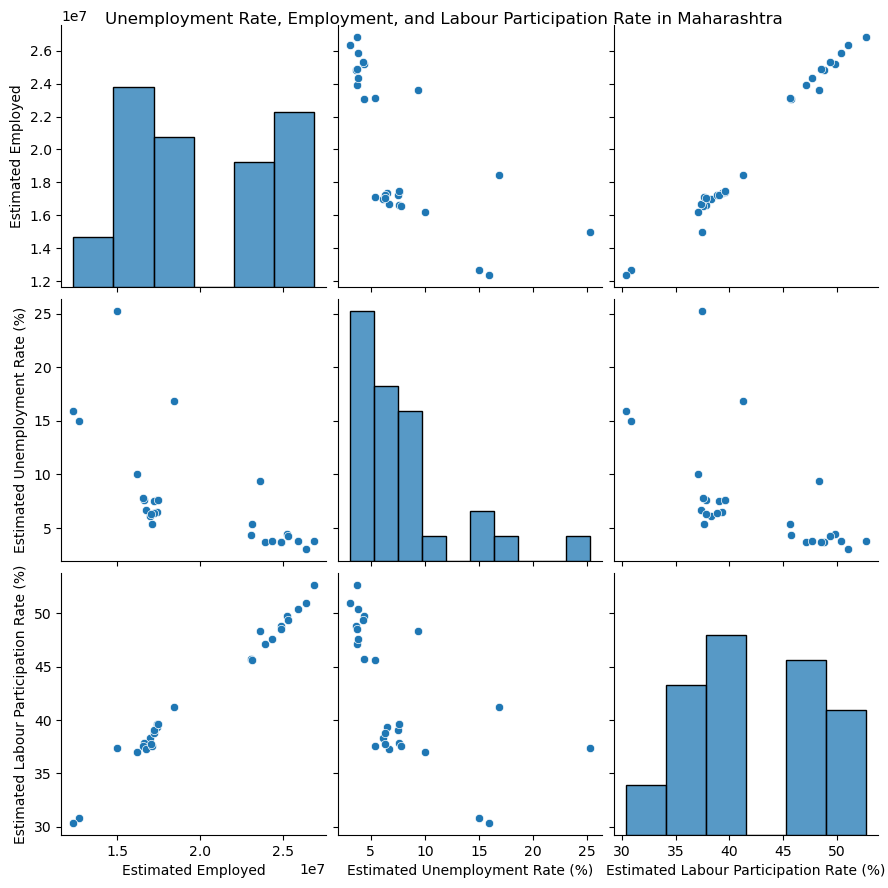

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

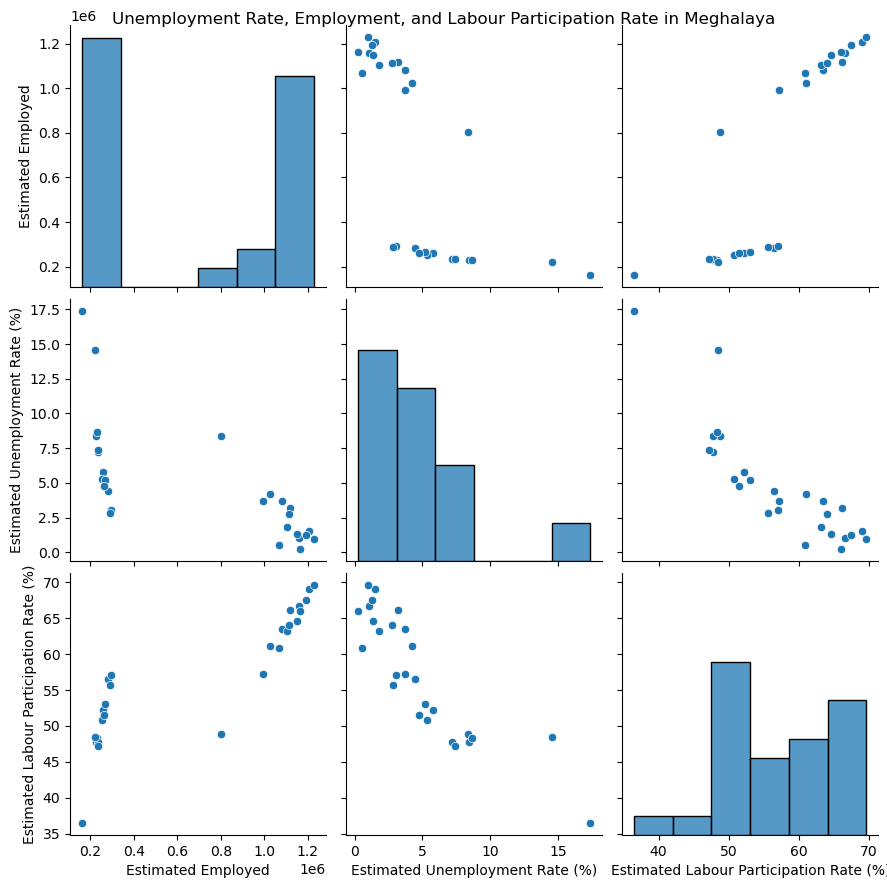

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

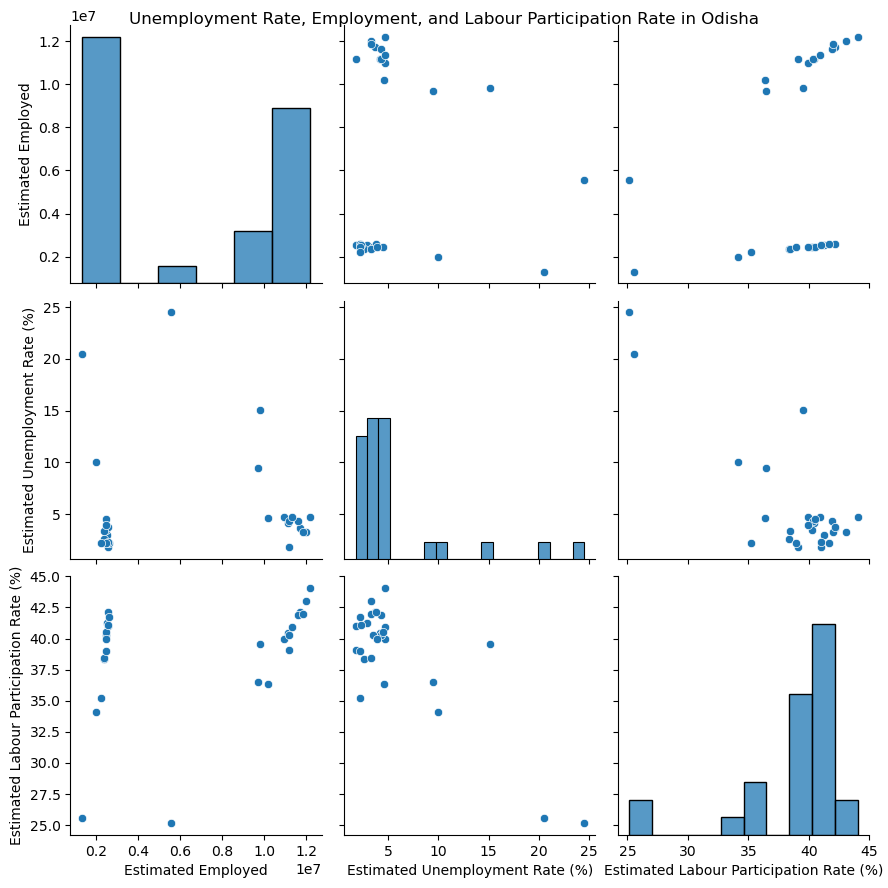

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

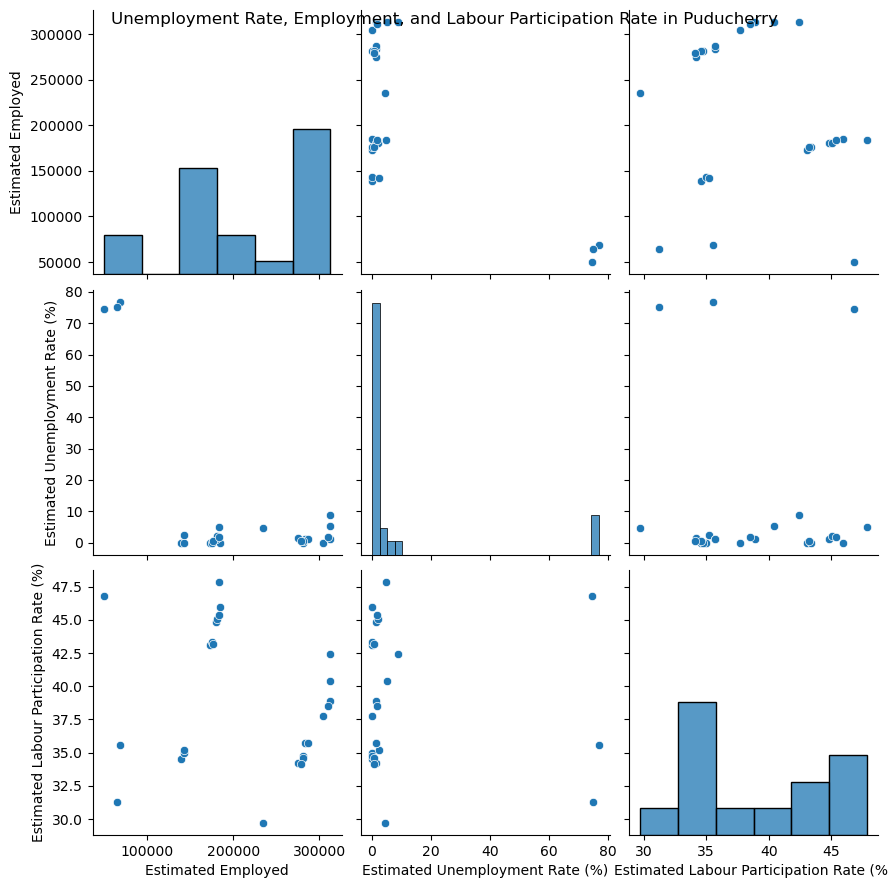

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

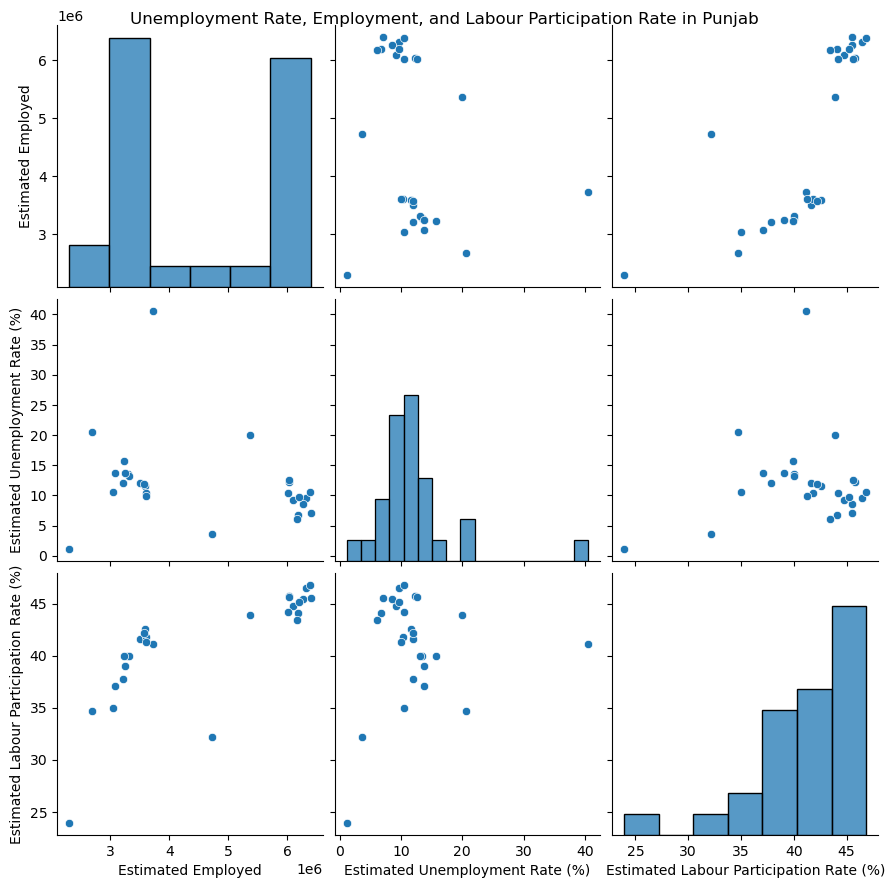

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

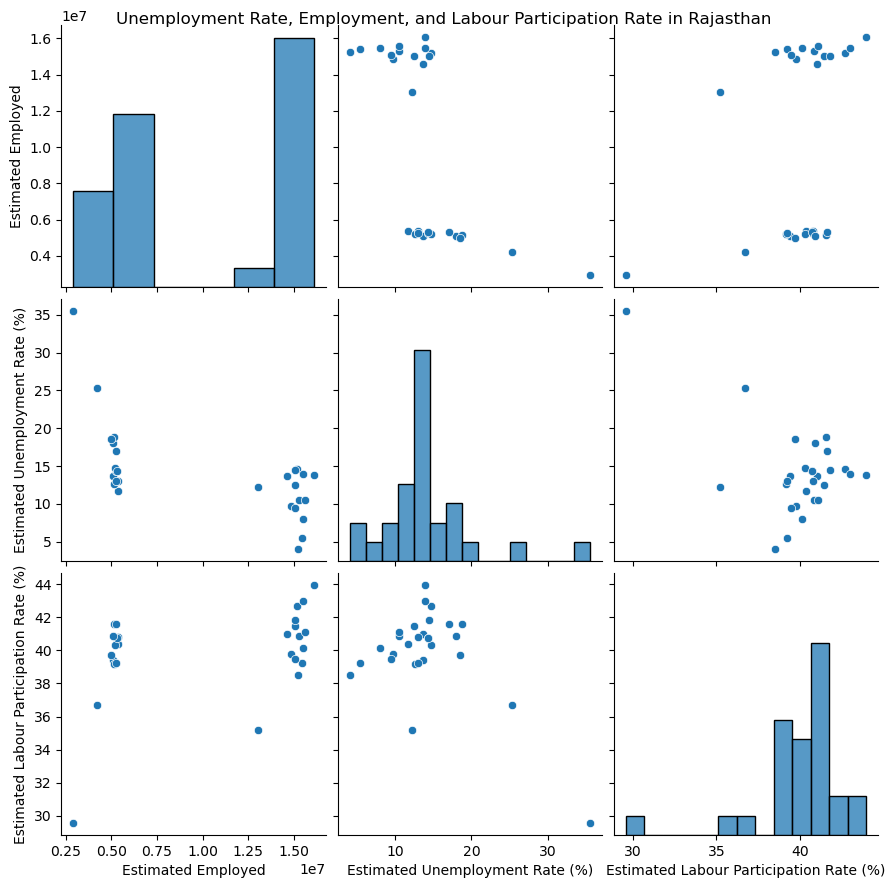

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

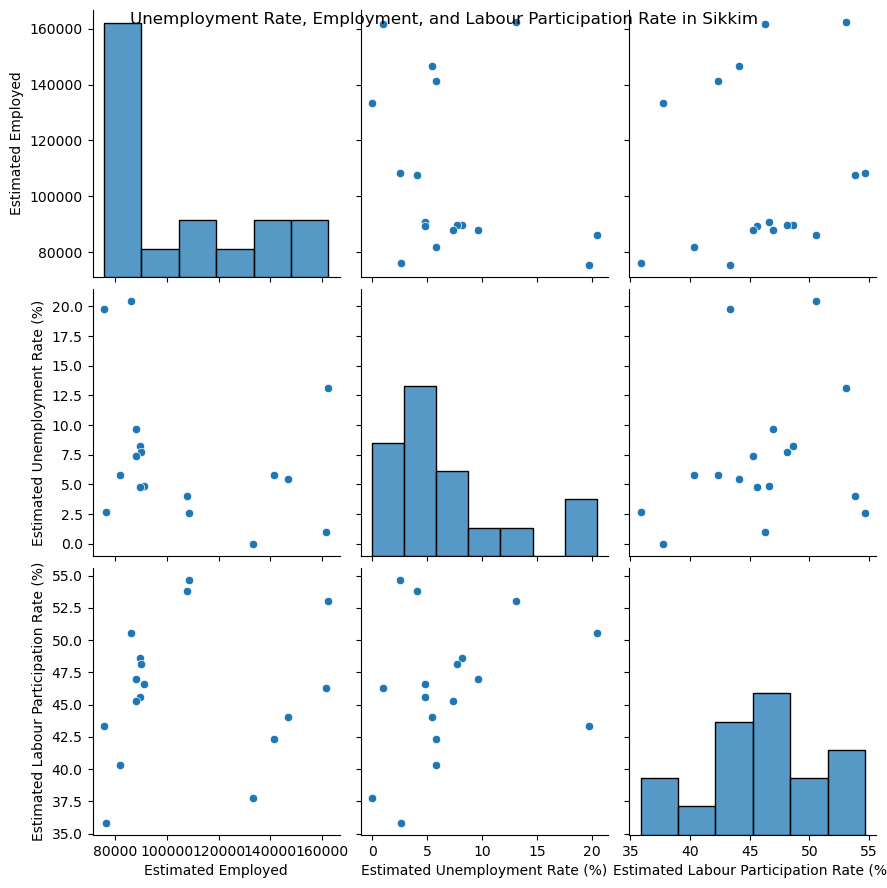

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

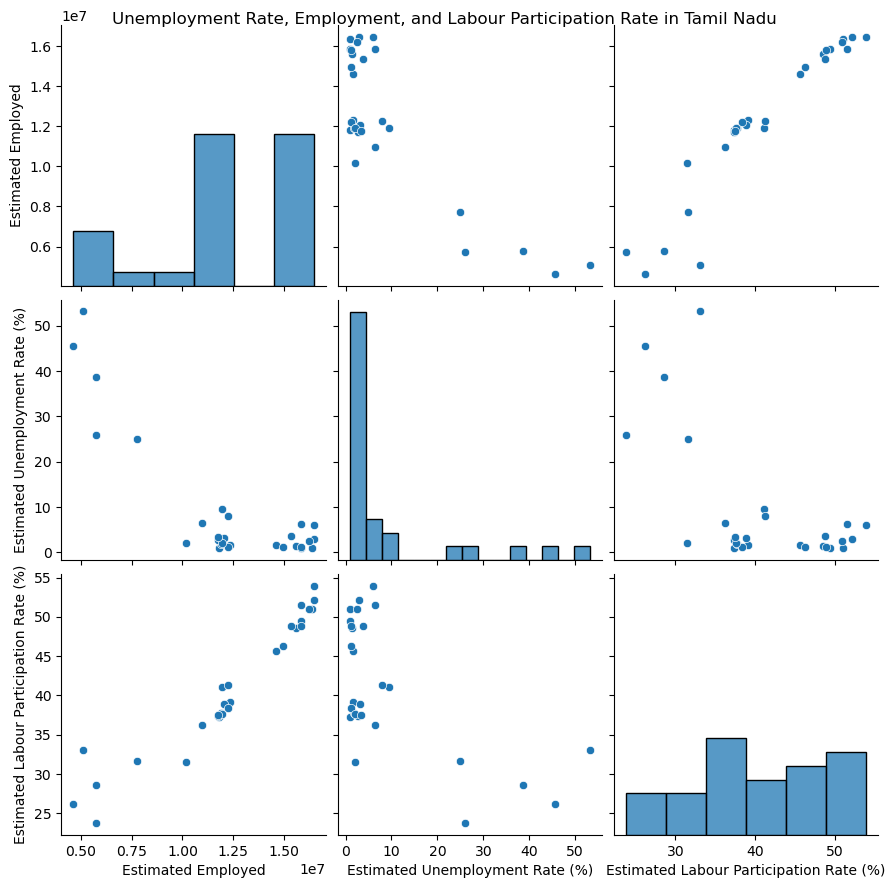

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

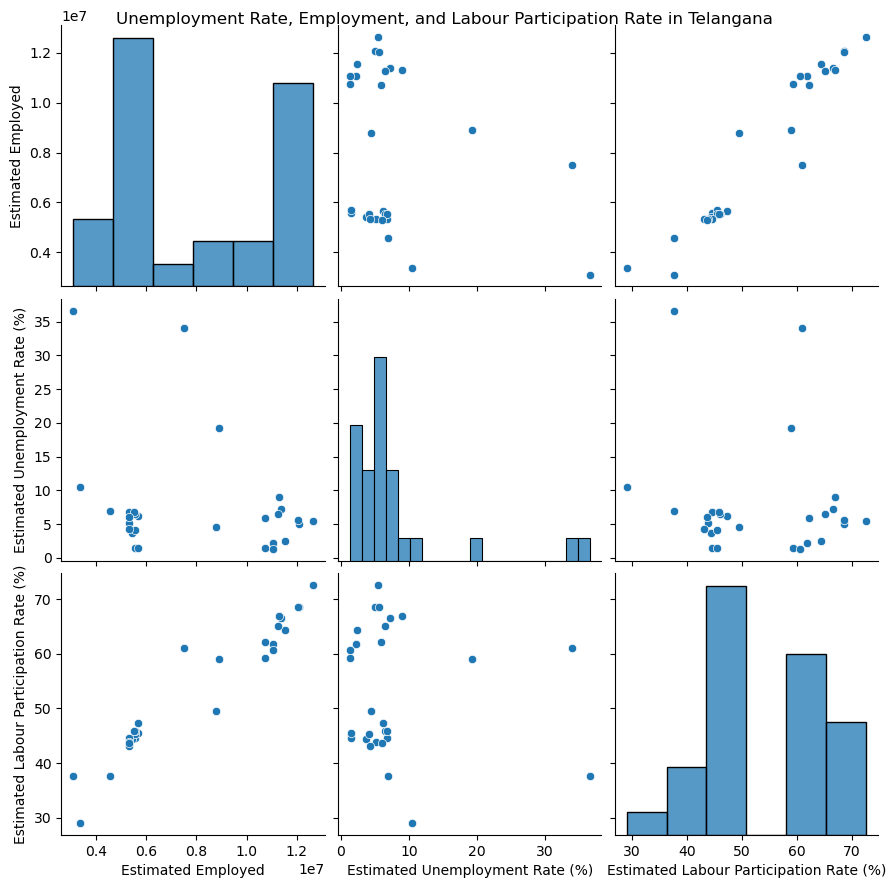

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

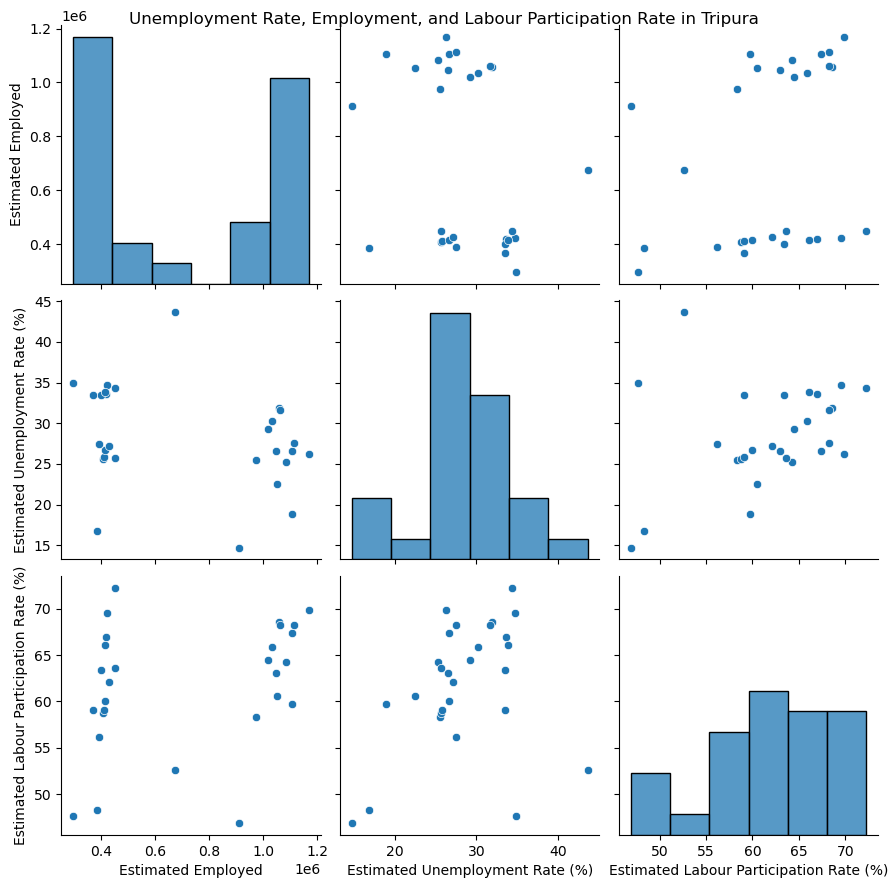

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

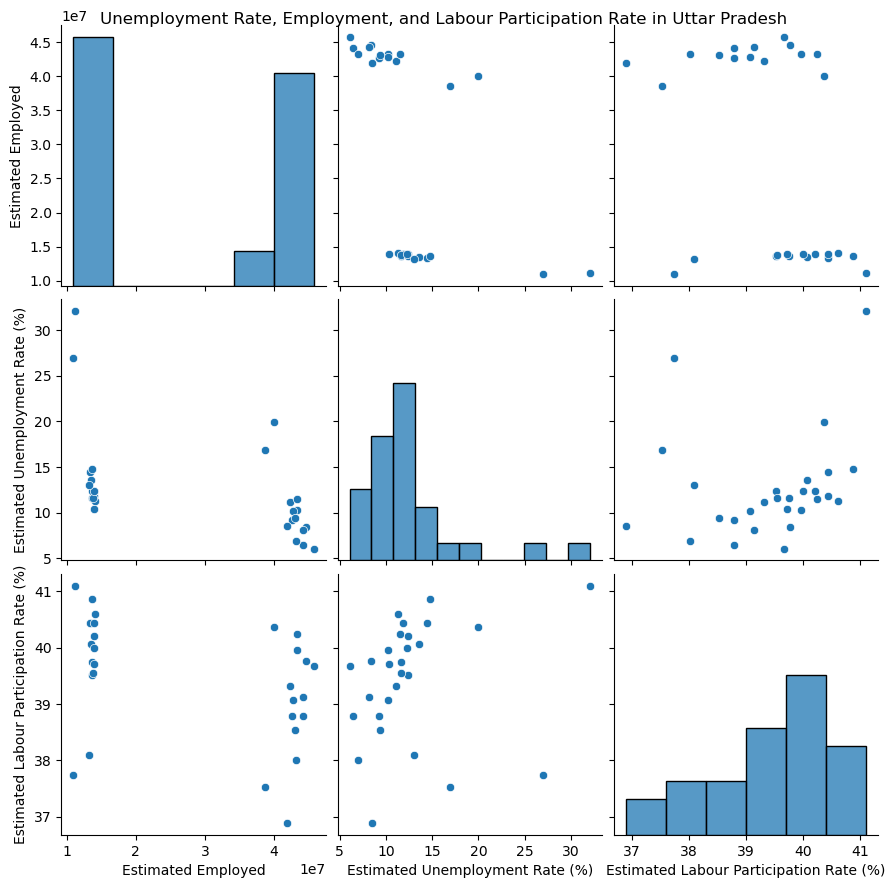

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

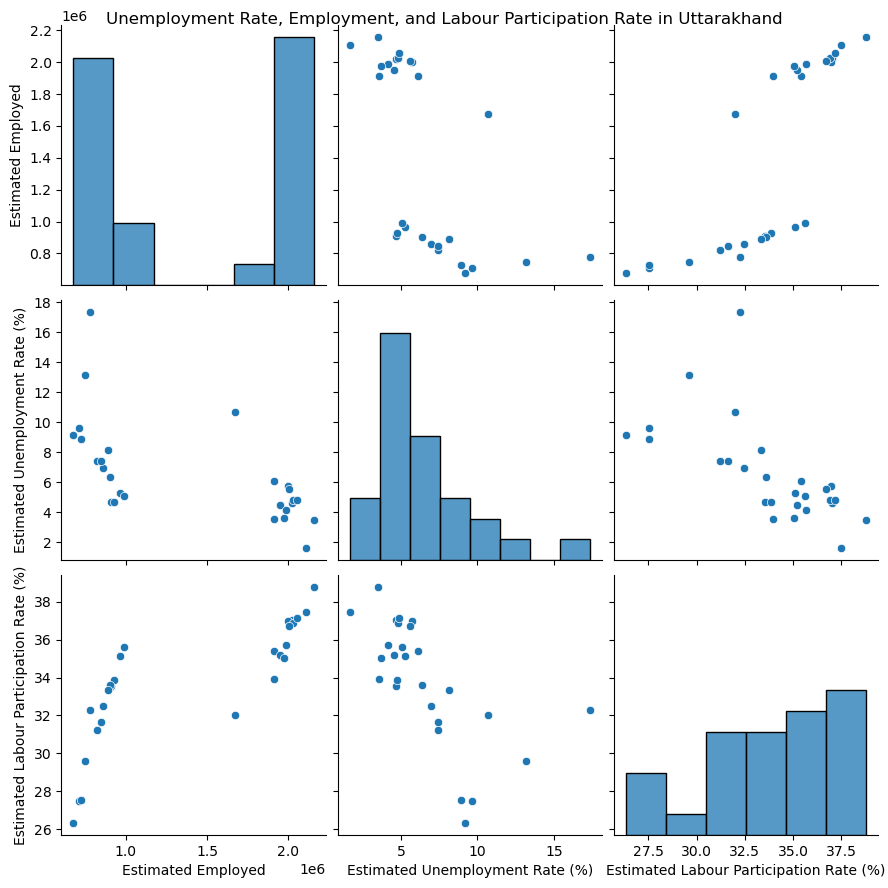

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

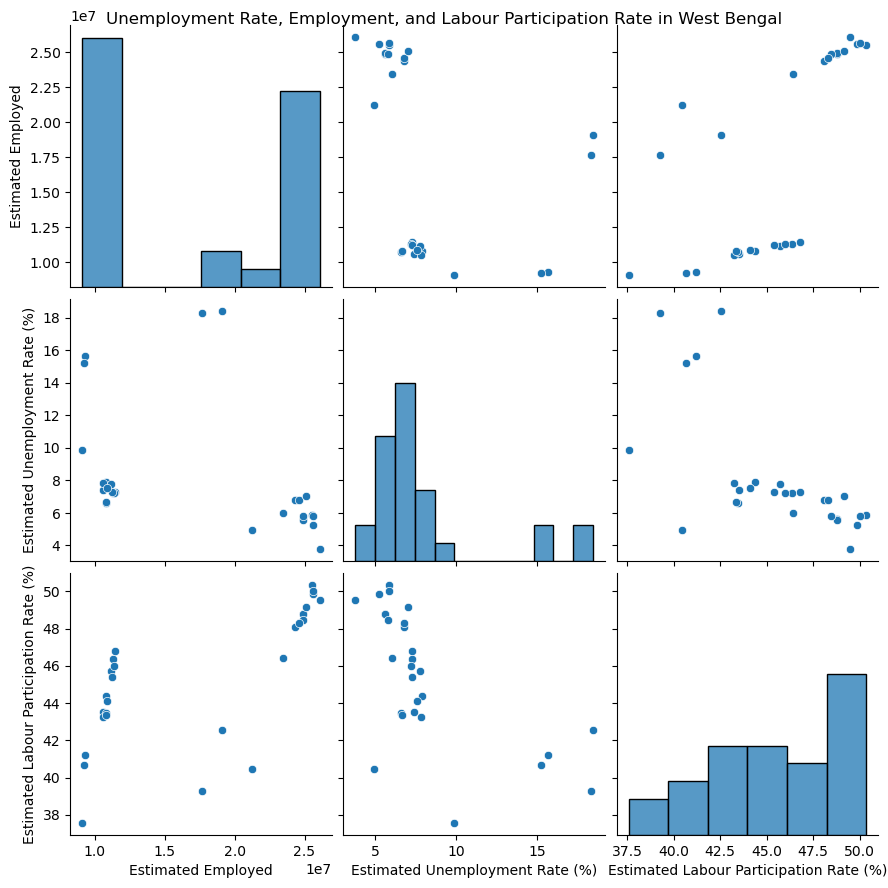

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1400x100 with 0 Axes>

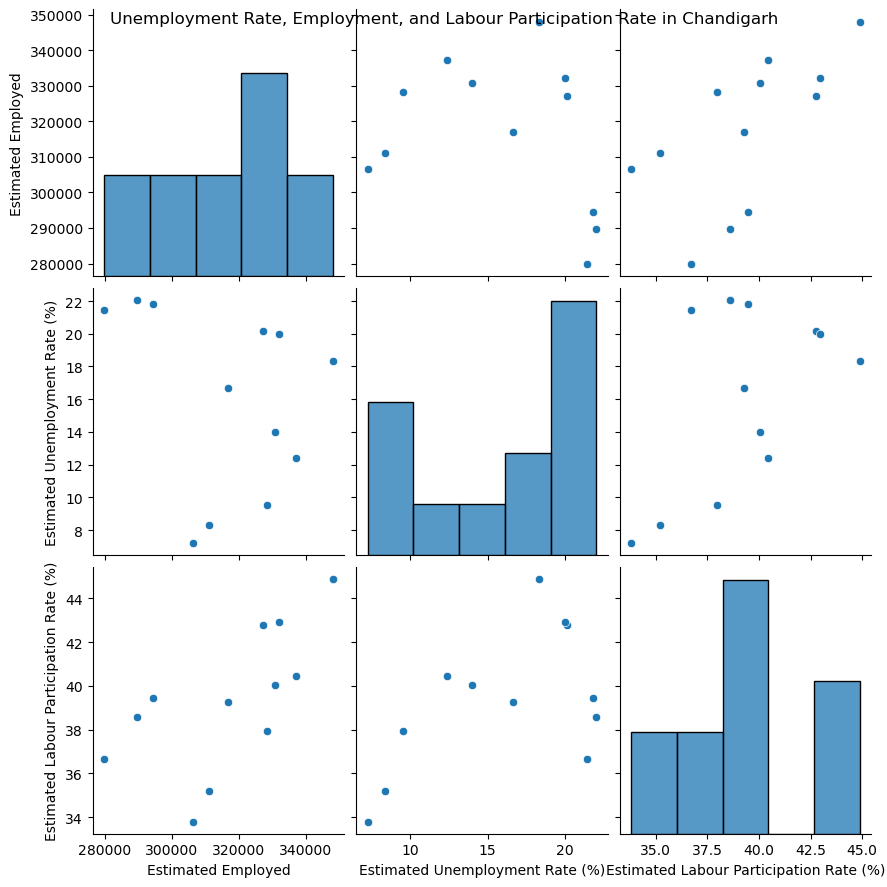

In [22]:
for region in regions:
    region_df = unemployment_df[unemployment_df['Region'] == region]
    plt.figure(figsize=(14, 1))
    sns.pairplot(data=region_df, vars=['Estimated Employed', 'Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)'], height=3)
    plt.suptitle(f'Unemployment Rate, Employment, and Labour Participation Rate in {region}')
    plt.show()

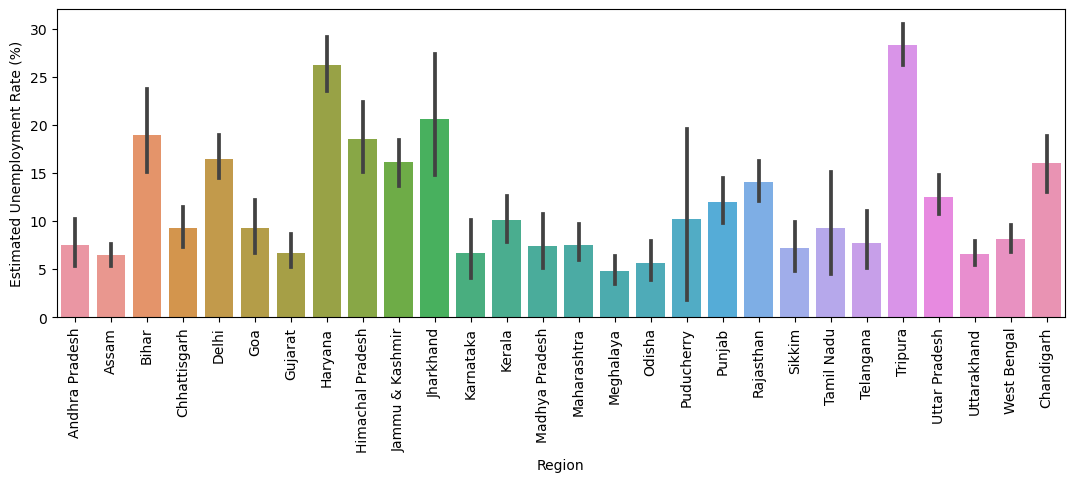

In [23]:
#BAR PLOT TO COMPARE BETWEEN MEANS OF DIFFERENT REGIONS
plt.figure(figsize=(13, 4))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=unemployment_df)
plt.xticks(rotation=90)
plt.show()

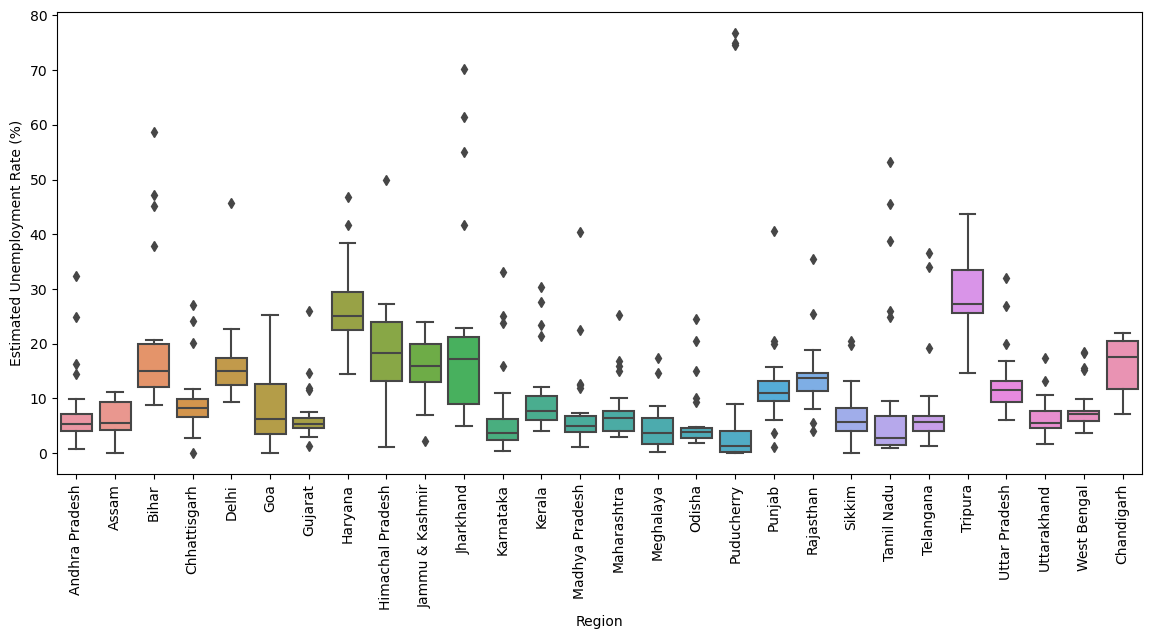

In [24]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=unemployment_df)
plt.xticks(rotation=90)
plt.show()

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

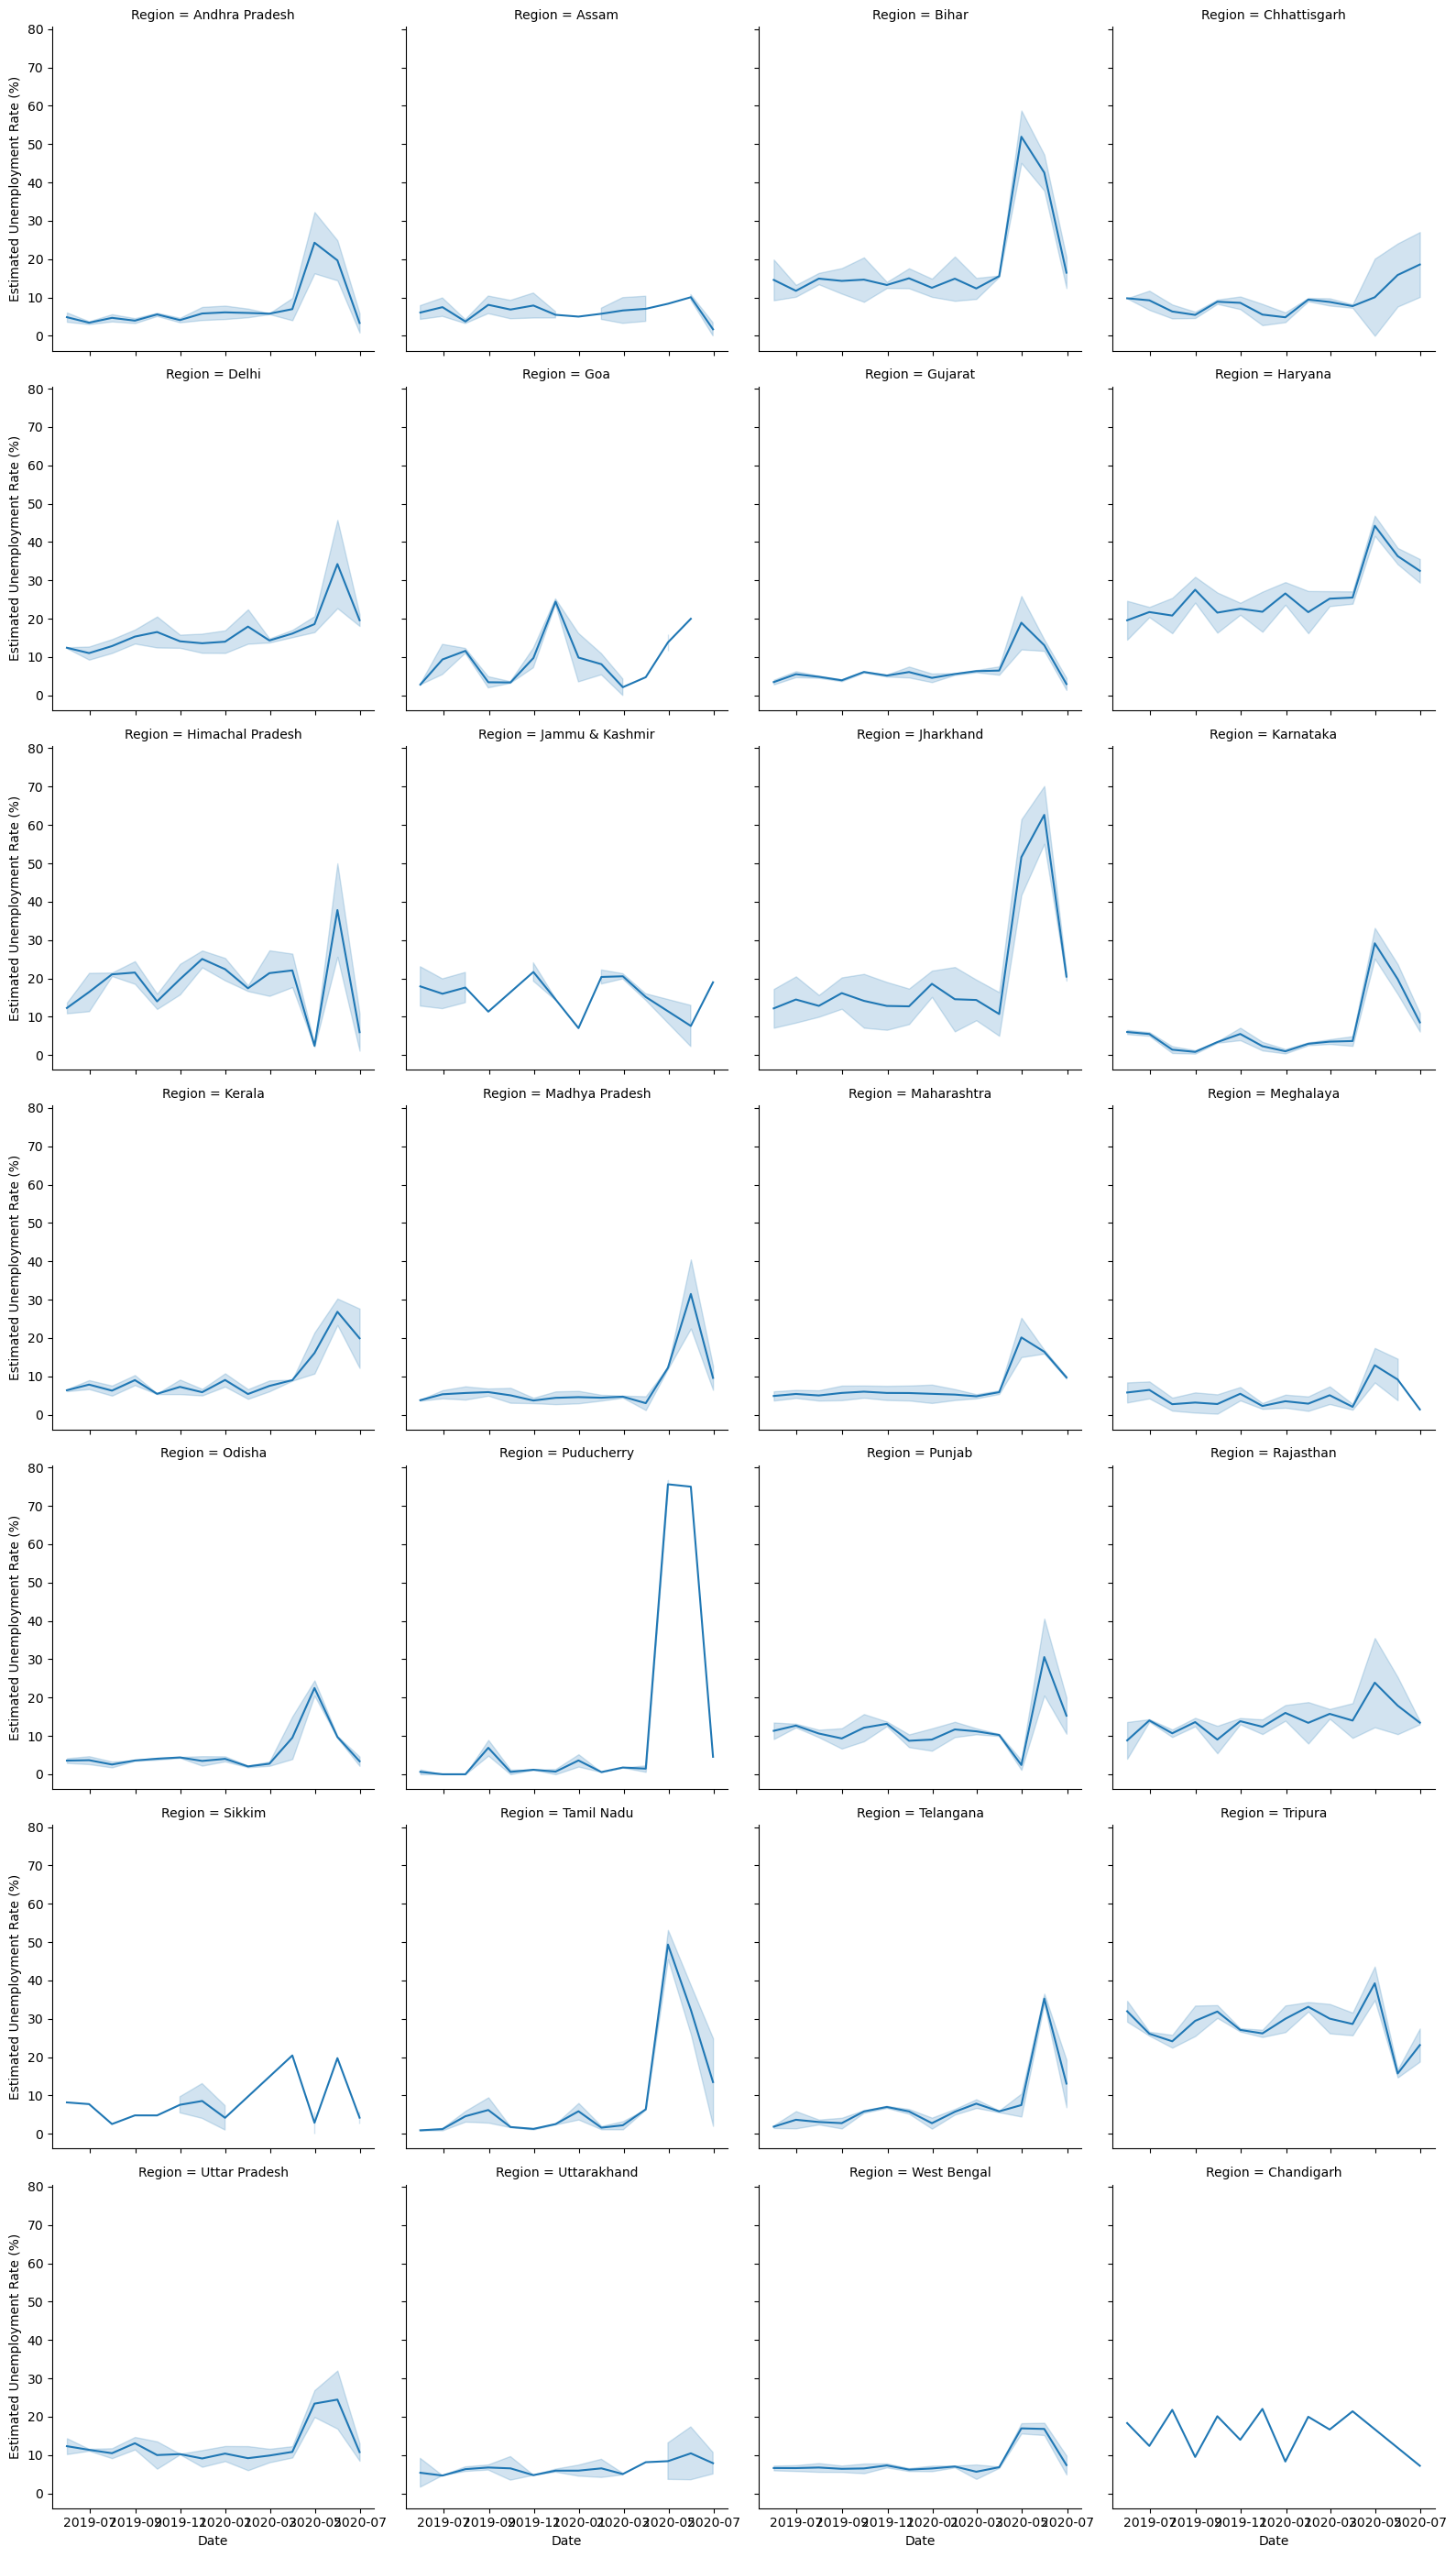

In [25]:
#FACET GRID TO PLOT THE STATISTICS OF UNEMPLOYMENT FOR THE DATES FOR ALL THE STATES
g = sns.FacetGrid(unemployment_df, col='Region', col_wrap=4, height=4)
g.map(sns.lineplot, 'Date', 'Estimated Unemployment Rate (%)')
plt.show()

In [26]:
numeric_columns = unemployment_df.select_dtypes(include=['number']).columns #exclude non-numeric dtypes
corr = unemployment_df[numeric_columns].corr()
print(corr)

                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  


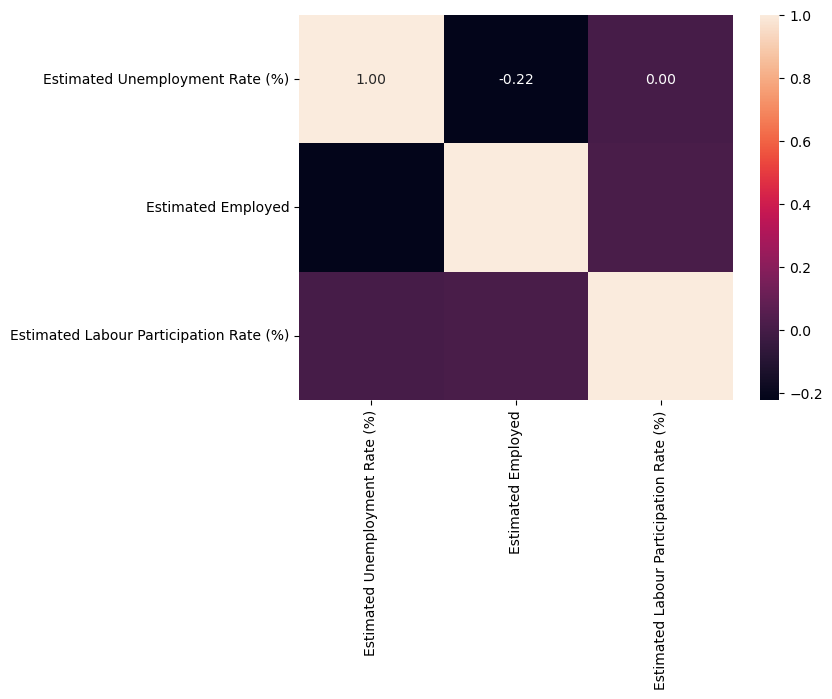

In [27]:
plt.figure(figsize=(7,5))
sns.heatmap(corr,annot = True,fmt=".2f")
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [33]:
X = unemployment_df[['Estimated Employed', 'Estimated Labour Participation Rate (%)']]
y = unemployment_df['Estimated Unemployment Rate (%)']
model = LinearRegression().fit(X, y)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-2.95517176e-07  6.71104146e-03]
Intercept: 13.63089511047345


C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


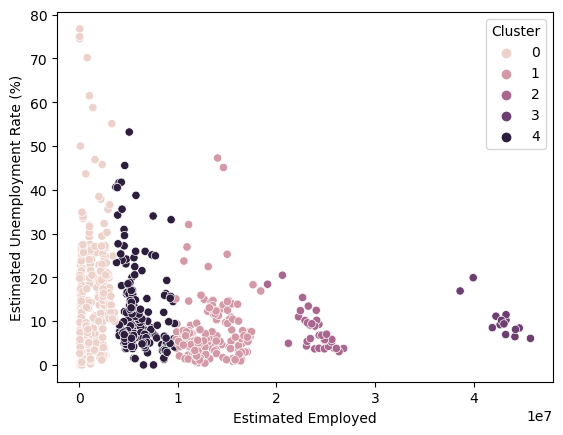

In [38]:
kmeans = KMeans(n_clusters=5)
unemployment_df['Cluster'] = kmeans.fit_predict(X)
sns.scatterplot(x='Estimated Employed', y='Estimated Unemployment Rate (%)', hue='Cluster', data=unemployment_df)
plt.show()